# <span style="color:blue"> *Version 2* </span>

# Lab#5 - Mobility and Handovers in LTE 

In this lab, we will explore the handover mechanism in LTE networks. We will be focusing on X2 based handover between different eNBs as the UE moves between their coverage areas. We will cover different user equipment (UE) states at the RRC level to observe the status of the handover along with the monitoring of the RSRP, RSRQ, SINR, as well as the Instantaneous Throughput to detect the impact on QoS. Several impacting parameters will be explored to understand the coverage behavior of cells in complex radio environments. 

Following is a short summary of the objectives for this lab: 
- Understand the state flow and signaling associated with a handover 
- Observe the coverage (RSRP, RSRQ, SINR) and traffic (Throughput) metrics during handovers. 
- Study the impact of Bandwidth to the eNBs on the observed throughput for UEs. 
- Study the impact of the network environment on the observed performance metrics for coverage and traffic. 

Relevant chapters in the textbook <a href="#References">[1]</a> are: <b>Sections 4.6.3</b> (pp. 254) and <b>Sections 4.7</b> (pp. 260). 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## <a id='task1'> 1. Introduction </a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Handovers in cellular networks are accomplished by a number of strategies, including <b>hard</b> handover, <b>soft</b> handover, and <b>hybrid</b> handover. Hard handover is the process of totally disconnecting from the serving cell before connecting to the destination cell. Soft handover, on the other hand, entails keeping connections with both the serving and target cells during the handover procedure, allowing for ongoing communication. LTE only supports hard handovers due to the diversity in utilized carrier freqeuncies.

The hybrid handover procedure begins with a soft handover, and if the signal strength of the destination cell is sufficient, the connection is handed over to the target cell. If the destination cell's signal strength is insufficient, the connection is released and re-established. The hybrid handover procedure begins with a soft handover, and if the signal strength of the destination cell is sufficient, the connection is handed over to the target cell. If the destination cell's signal strength is insufficient, the connection is released and re-established.

Generally, handovers in LTE are divided into two categories: inter-eNodeB (inter-cell) and inter-MME (inter-PLMN). These handovers are carried out using several interfaces, the most common of which being the X2 and S1 interfaces.

The X2 interface is usually used for inter-eNodeB handovers, which involve the transfer of a mobile device's connection from one eNodeB within the same LTE network to another without the intervention from MME (there are exceptions of course for example when MME has to be changed). The X2 interface allows eNodeBs to exchange handover information such as destination cell identity and signal quality. This information assists the destination eNodeB in preparing for the handover and guarantees that the mobile device's connection transitions smoothly.

The S1 interface is used for inter-MME handovers, which require moving a mobile device's connection between LTE networks or between LTE and other types of networks, such as 3G or 2G networks. The S1 interface enables the source MME (Mobility Management Entity) to transmit information about the handover with the destination MME, such as the identification of the target cell and the context of the mobile device (e.g., user identity, location, and security credentials).

We consider an Intra-MME X2-based handover for this lab, where X2 interface between neighboring eNBs is utilized for the initiation and completion of handover process along with the allocation and recovery of resources for the serving and target eNB. 

### 1.1 Sample Topology Model 

The aim of this lab is to compare multiple scenarios involving the impact of cellular coverage, environment and available resources on the performance of handover. Figure 1 represents an urban environment with buildings. The same topology is also used to represent a rural setting by simply removing the buildings. Points A and B in <a id='fig1'> [Figure. 1](#fig1) </a> represent the path taken by the mobile UE as its traverses between coverage of eNBs. 

  

| | 
|---| 
| 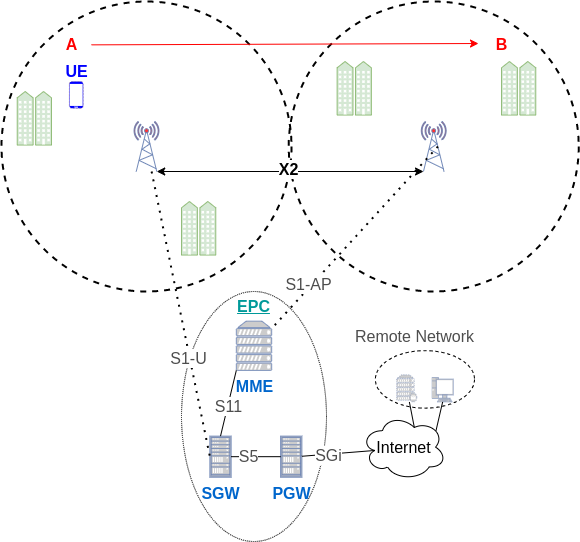 |   

<a id='fig1'><p style="text-align: center;"><b>[Figure. 1: A sample topology for visualizing X2-based handover.](#fig1)</b></p></a> 

We will use some variations of this sample topology for different tasks in the lab.


### 1.2 Cellular Parameters 

In this lab, we will consider a set of parameters for evaluating the performance of the handover process. The designed tasks intend to explore the following parameters and their impact on the performance parameters: 

- <b> Transmit Power of eNBs</b> 
Different values of transmit power will dictate the range or coverage of eNB in any particular direction. In this lab, we will utilize omnidirectional antennas to have uniform coverage in all directions. 

- <b> Cellular Environment Model (Clutter such as buildings) </b> 
We use multi-story buildings designed in the ns-3 simulation environment to enable the utilization of different channel models. These channel models cater for the channel distortions like reflection, scattering, absorption and propagation of radio signals between UE and eNBs.

- <b> Bandwidth and EARFCN Allocation at eNB</b> 
Different levels of bandwidth can be available in different eNBs for utilization by UE services. This has been modeled along with the possibility to allocate different EARFCNs (E-UTRA Absolute Radio Frequency Channel Number) to different eNBs in order to study the impact due to inter-cell interferences during handover process. 
<br> 

### 1.3 Performance Measurement Parameters 

<p style='text-align: justify;'> We will observe 3 parameters to measure the performance of the received signal at the users during the simulation. These are stated below in <a id='table1'>Table. 1</a> along with their respective ranges for reference. </p>  

| Connectivity | RSRP (dBm) | RSRQ (dB) | SINR (dB) | 
|--------------|--------------------|---------------------|-----------| 
| <code style="background:lime;color:black">Excellent</code>    | <code style="background:lime;color:black">>= -80 </code>            | <code style="background:lime;color:black">>= -10 </code>              | <code style="background:lime;color:black">>= 20 </code>     | 
| <code style="background:lightsalmon;color:black">Good</code>          | <code style="background:lightsalmon;color:black">-80 to -90</code>         | <code style="background:lightsalmon;color:black">-10 to -15</code>          | <code style="background:lightsalmon;color:black">13 to 20</code> | 
| <code style="background:coral;color:black">Medium</code>       | <code style="background:coral;color:black">-90 to -100</code>        | <code style="background:coral;color:black">-15 to -20</code>          | <code style="background:coral;color:black">0 to 13</code>   | 
| <code style="background:black;color:white">Weak</code>         | <code style="background:black;color:white"><= -100</code>            | <code style="background:black;color:white">< -20</code>               | <code style="background:black;color:white"><= 0</code>      | 
<p style="text-align: center;"><b><a id='table1'>Table. 1: Reference connectivity state for different ranges. </a></b></p> 

<b>Note:</b> The values for these parameters are negative and mathematically -70dBm is considered better than -80dBm.<br> 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <a id='task1'> 2. Analyzing Mobility and Handovers in LTE </a> 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
This section introduces the process and mechanics of handover (HO) in LTE. A UE reports certain measurements for RSRP, RSRQ and SINR in the form of periodic measurement reports to the serving eNB. These reports also include prospective neighbor cells with pre-existing neighbor relations with the serving eNB. There are observable events A1, A2, A3, A4, and A5 described in <a id='table2'>Table. 2</a> and shown in <a id='fig2'> [Figure. 2](#fig2) </a>. These measurement reports from the UE generated for the eNB include two values: one for the serving cell and the other for the neighboring cells. The eNB utilizes the available handover algorithms to assess the events A1-A5 to decide the necessity of the handover.  

| Event | Description| 
|--------------|--------------------| 
| **A1**   | Serving cell becomes better than a defined threshold | 
| **A2**   | Serving cell becomes worse than a defined threshold | 
| **A3**   | Neighbor cell becomes better than serving cell by an offset factor (<b>hysteresis</b>) | 
| **A4**   | Neighbor cell becomes better than a defined threshold | 
| **A5**   | Serving cell becomes worse than threshold1 and neighbor cell becomes better than threshold2 | 

<p style="text-align: center;"><b><a id='table2'>Table. 2: Handover events in LTE. </a> (Source <a href="#References">[2]</a> )</b></p> 

The relationship between these so measurement events segregates different decision-making moments before, during and after the HO process in LTE. Events A2, A4 and A3 are utilized mainly for the HO based on the actual algorithm implementation. We will consider A2 and A4 events in order to perform finely tuned and best performing HOs. 
 
| | 
|---| 
|![lab5-ho-mechanics2.png](Figures/lab5-ho-mechanics2.png)|   

<a id='fig2'><p style="text-align: center;"><b>[Figure. 2a: Events A1-A5 for a 2-cell scenario. (RSRQ vs Time)](#fig2) (Source <a href="#References">[3]</a> )</b></p></a> 
    
### 2.1 Initiation of Handovers in LTE
Hysteresis and time-to-trigger (TTT) are two critical characteristics in LTE (Long-Term Evolution) handovers that help to improve network performance and eliminate needless handovers.

#### 2.1.1 Hysteresis
Hysteresis is a threshold concerning A3 event that establishes the difference in signal intensity between the serving and target cells prior to initiating a handover. It is used to avoid unwanted handovers by requiring a particular amount of signal strength differential before starting a HO. This threshold is used to prevent the mobile device from moving between cells owing to slight signal strength variations. Hysteresis requires a particular threshold of difference in signal intensity before initiating a HO, reducing the incidence of needless handovers.
    
| | 
|---| 
|![lab5-ho-hyst-offset.png](Figures/lab5-ho-hyst-offset.png)|   

<a id='fig2'><p style="text-align: center;"><b>[Figure. 2b: Hysteresis and TTT in Handovers. (RSRQ vs Time)](#fig2) (Source <a href="#References">[4]</a> )</b></p></a>
#### 2.1.2 Time-to-Trigger (TTT)
The time to trigger is commonly measured in milliseconds (ms) and is used to ensure that handovers are begun as soon as possible but not too soon.The "time to trigger" is the period between when a mobile device detects a stronger signal from a destination cell and when the device initiates a handover to the target cell. The time to trigger is commonly measured in milliseconds (ms) and is used to ensure that handovers are begun as soon as possible but not too soon.


In conclusion, hysteresis and TTT are two critical handover characteristics utilized in LTE to eliminate needless handovers, increase network performance, and lengthen the battery life of mobile devices. We utilize the <u>following values for hysteresis and TTT</u> in this lab:

- <b>Hysteresis = 2dB</b>
- <b>Time-to-Trigger = 16ms</b>

### 2.2 Thresholds in the Handover Process

<b>A1</b>: The threshold for A1 event is defined by the Serving cell as a measurement threshold. This threshold can be based on variou criteria, such as RSRQ or RSRP. When the RSRQ or RSRP decreases below the predefined threshold, the Serving cell will start looking for a suitable target cell for handover.

<b>A2</b>: The threshold for A2 event is also a measurement threshold. The Serving cell measures the RSRQ or RSRP of neighboring cells and compares them to the threshold. If the measurement reports of neighboring cells exceed the threshold, the Serving cell selects a target cell for handover.

<b>A3</b>: The threshold for A3 event is the Handover Margin. It is the difference between the measurement report of the Serving cell and the Target cell. The Serving cell will initiate a handover to the target cell only if the Handover Margin is positive.

<b>A4</b>: The threshold for A4 event is the Handover Success Rate. It is the probability that the Target cell will accept the handover request. The Serving cell will send the Handover Request to the Target cell only if the Handover Success Rate is above a predefined threshold.

<b>A5</b>: The threshold for A5 event is the Time-to-Trigger. It is the time interval between the detection of a handover trigger (A1 event) and the sending of the Handover Command to the mobile device. The Time-to-Trigger should be less than the predefined threshold to ensure a smooth handover process.

The thresholds play a critical role in the handover process as they help ensure that the handover is performed efficiently and seamlessly. The thresholds are predefined by the network operator and can be adjusted based on network conditions to optimize the handover performance.

## 3. <a id='task1'> <span style="color:red"> *Task#1: Assessing the need for a HO* </span></a> 
This task will consider a single eNB scenario as in the previous labs in order to understand the actual requirement in cellular networks for a handover. We will simulate this RAN topology to understand the behavior of mobile UE as it moves past the coverage of the eNB.

### 3.1 Designing a RAN topology 
The topology design follows the same basic steps from lab0 starting from accessing the react app, designing and saving the topology. Kindly utilize the blueprint provided in <a id='fig3'> [Figure. 3](#fig3)</a> to design the topology where the actual location of eNB and UEs is not important if the users are inside the coverage area of eNB. The <b>eNB transmit power</b> must be chosen as <b> 40dBm</b> for this task.    
  
| | 
|---| 
|![lab5-task1-top.png](Figures/lab5-task1-top.png) |   
<a id='fig3'><p style="text-align: center;"><b> Figure. 3: A simple mobility example.</b></p></a> 
 
> <b>Adding Mobile UE</b>: To add a mobile UE, follow the steps as shown below: 
> - Click on 'Add mobile UE path' to place the UE 
> - Click on 'Add mobile UE path' to get the starting point of the mobile UE path labeled <b><span>&#9312;</span></b>. 
> - Click on 'Add mobile UE path' to get the next point of the mobile UE path labeled <b><span>&#9313;</span></b>. (and so on) 

### 3.2 Simulate the designed topology in ns-3 
The python code in <b>lab5-init.py</b> is provided to convert the design topology in a form acceptable to the SEM and ns-3 simulation engines. Moreover, some relevant command line arguments are also passed to the ns-3 program implementing the given topology in order to observe the results and status of the simulation.  These parameters include the information extracted from the topology in <a id='fig3'> [Figure. 3](#fig3)</a> about location, transmit power from the react interface as well as the selection parameters for collecting different performance parameters like (RSRP, RSRQ, etc.) and/or connection setup logs. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate. 
<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files) 
- <b>enable handover = yes or no</b>  <-- Select no
- show topology (yes or no) 

In [6]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
3_1Des



List the simulation to run:  3_1Des


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 no


X2 will be disabled blocking HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image 3_1Des.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.48s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.45s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.70s/simulation]

Simulation 3 finished!


### 3.3 Pre-processing simulation results 
The python code in <b>lab5-DataPre.py</b> is provided to process and clean the obtained data from ns-3 simulations. The following set of variables provides the state of the collected data from the ns-3 simulations. 

<ul> 
    <li><b>Before</b> data cleaning and formatting</li> 
    <ul> 
      <li>result_signalpower (for RSRP, RSRQ results) </li> 
      <li>result_sinr (for SINR results) </li> 
      <li>result_throughput (for SINR results) </li> 
    </ul> 
  </li> 
</ul> 

In [7]:
%run -i 'Modules/lab5-dataPre.py'

time     tput      ue
user11 0   0.06435  0.00000  user11
       1   0.11435  0.00000  user11
       2   0.16435  0.00000  user11
       3   0.21435  0.00000  user11
       4   0.26435  0.00000  user11
       5   0.31435  0.62500  user11
       6   0.36435  0.78125  user11
       7   0.41435  0.78125  user11
       8   0.46435  0.78125  user11
       9   0.51435  0.78125  user11
       10  0.56435  0.78125  user11
       11  0.61435  0.62500  user11
       12  0.66435  0.78125  user11
       13  0.71435  0.78125  user11
       14  0.76435  0.78125  user11
       15  0.81435  0.78125  user11
       16  0.86435  0.78125  user11
       17  0.91435  0.78125  user11
       18  0.96435  0.78125  user11
       19  1.01435  0.62500  user11

In [11]:
# to visualize the contents of the metric variables
display(res_signalpower)
display(res_sinr)
display(res_throughput.head(20))

time   sig_power  sig_quality      ue
user11 0    0.3 -127.590036    -4.568557  user11
       1    0.4 -127.590036    -4.568557  user11
       2    0.5 -127.590036    -4.568557  user11
       3    0.6 -127.590036    -4.568557  user11
       4    0.7 -127.590036    -4.568557  user11
...         ...         ...          ...     ...
user12 42   4.5 -132.376566    -6.626951  user12
       43   4.6 -132.820801    -6.883515  user12
       44   4.7 -133.253179    -7.143784  user12
       45   4.8 -133.674278    -7.407071  user12
       46   4.9 -134.084640    -7.672732  user12

[94 rows x 4 columns]

time      sinr      ue
user11 0   0.299214  3.649051  user11
       1   0.399214  3.649051  user11
       2   0.499214  3.649051  user11
       3   0.599214  3.649051  user11
       4   0.699214  3.649051  user11
...             ...       ...     ...
user12 43  4.599214 -1.806311  user12
       44  4.699214 -2.232788  user12
       45  4.799214 -2.648270  user12
       46  4.899214 -3.053282  user12
       47  4.999214 -3.448310  user12

[96 rows x 3 columns]

time      tput      ue
user11 0   0.06435       NaN  user11
       1   0.11435       NaN  user11
       2   0.16435       NaN  user11
       3   0.21435       NaN  user11
       4   0.26435       NaN  user11
       5   0.31435       NaN  user11
       6   0.36435       NaN  user11
       7   0.41435       NaN  user11
       8   0.46435       NaN  user11
       9   0.51435       NaN  user11
       10  0.56435       NaN  user11
       11  0.61435       NaN  user11
       12  0.66435       NaN  user11
       13  0.71435       NaN  user11
       14  0.76435  0.500000  user11
       15  0.81435  0.552083  user11
       16  0.86435  0.604167  user11
       17  0.91435  0.656250  user11
       18  0.96435  0.708333  user11
       19  1.01435  0.750000  user11

The results will be available in the following variables for further processing after completion of a ns-3 simulation, 
- **result_signalpower** provides information regarding received signal power and signal quality for cellular users. 
- **result_sinr** provides information regarding received signal power and interference experienced by the cellular users. 
- **result_throughput** provides information regarding averaged user throughput in downlink and uplink for cellular users.

In addition, we also have the variables named <b>campaign</b> and <b>campaign1</b>which are from the `lab5-init.py` containing the simulation objects for the ns-3 simulations. We use them here to obtain the results using the simulation objects. 

> Note: Users are identified in the simulations by their unique <b>RNTI</b> values in the current serving cell. For example, a user ID of <u>user21</u> identifies that the user has an RNTI of <u>1</u> and is connected to the cell with id <u>2</u>. Moreover, these values are subject to change in different simulation runs.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <a id='task1'> <span style="color:purple"> <b>Important:</b> </span></a>
The users connected to a cell ID = 1 will have the format user1x where x stands for different RNTIs but the cell ID is fixed for the cell. The following examples identify some of the observed user ID values:

<u><b>user11 and user12</u></b> show that there are 2 users with RNTI = 1 and 2 connected to cell ID = 1.

<u><b>user11 and user21</u></b> show that there is 1 user with RNTI = 1 and that there are two cells with cell ID = 1 and 2. (This is the most observable one in this lab)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.4 Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this from the extracted variables.

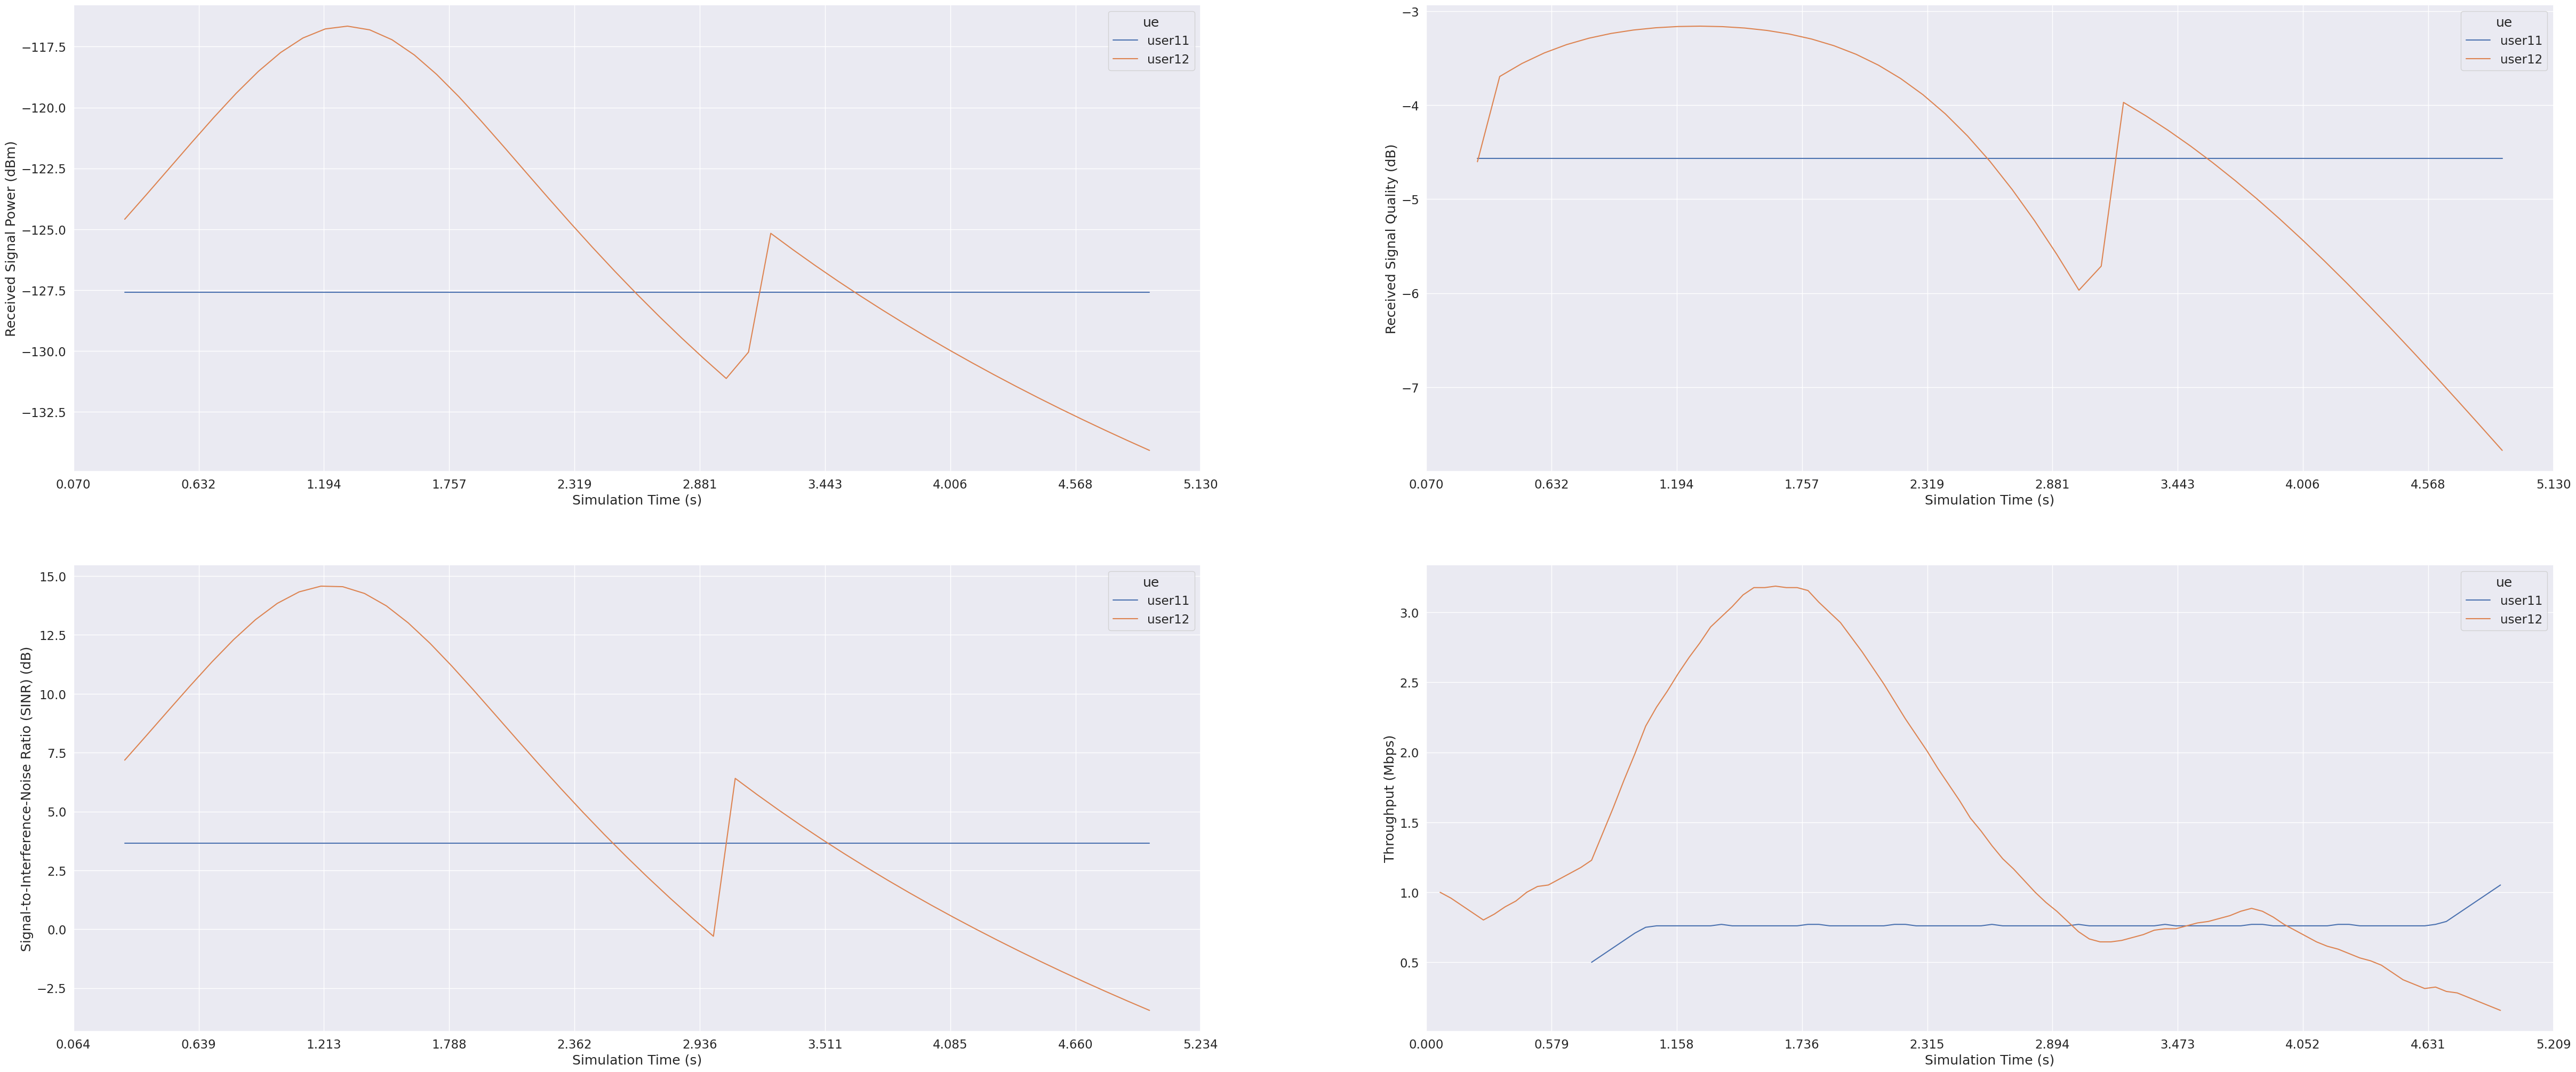

In [9]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))

plt.show()

sns.reset_orig()


### 3.5 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the cell. The impact on the static UE is negligible in the simulated LTE network. However, there are key points to be observed regarding the behavior of the static and mobile UE. These aspects are covered by the following exercises: 

### <u>Exercises</u>

#### Q3.5.1a: Explain the observed values of RSRP\RSRQ and SINR for the mobile UE? How does the values correlate to the experienced throughput for the mobile UE and explain how this correlated to the UE’s movement.

<b><u>Answer:</u></b> The observed values of RSRP, RSRQ and SINR are constant for user11, and quite poor. This is expected since it is standing still close to the edge of the cell. The observed values of RSRP, RSRQ and SINR is variying for User12 and this is also expected since this UE is moving first closer to the eNB and then further away. Therefore the results are first increasing and then decreasing. Around 2.9 seconds it gets a spike in all the values. This could be something wrong with the simulation.



#### Q3.5.1b: Is there something unexpected in the observed values for RSRP\RSRQ and SINR? Identify the problem if it exists?
> Hint: Consider the propagation losses during transmission as a factor to detect if a problem exists. 

<b><u>Answer:</u></b> 
We see a spike at 2.9 seconds in the graphs for the RSRP/RSRQ and SINR values, which doesn’t make sense since the signal shouldn’t be affected by our UE moving or changing modulation scheme. We talking with the TAs and they agreed it was weird, so to conclude this task; the unexpected thing is that we have spikes in the values which shouldn’t be there. 


#### Q3.5.2a: What type of channel characteristics and impairments causes the observed values of signal power, signal quality and SINR for the static user? 

> Hint: A easy to understand reference for understanding channel impairments is the [link] (https://www.tutorialspoint.com/wireless_communication/wireless_communication_channel_characteristics.htm). Some example of these impairments are fading, interference, propagation losses.

<b><u>Answer:</u></b>
Path loss is the ratio between the power of the signal sent compared to the power of the signal received. The path loss measures the loss of the sent signal power through the air, and thus it is an impairment that we will have to take into account. The UE is standing still, there’s no neighboring cells and there is no objects blocking the signal from the eNB to the UE, so we don’t have any other impairments on the static user.


#### Q3.5.2b: What type of channel characteristics and impairmentsand impairments causes the observed values of signal power, signal quality and SINR for the mobile user? 

> Hint: A easy to understand reference for understanding channel impairments is the [link] (https://www.tutorialspoint.com/wireless_communication/wireless_communication_channel_characteristics.htm). Some example of these impairments are fading, interference, propagation losses.

<b><u>Answer:</u></b>
As the user moves further away, there will be more path loss. There will also be a Doppler shift as the UE first moves closer to the eNB and then further away leading to a change of the recieved wavelength. There will be no interference as there is no other cells, and no fading as there is a clear path path with no obstacles to the eNB.


#### Q3.5.3: When the UE moves through the cell it has a variable signal from the eNB. Why/what mechanics causes a signal with variable strength to result in a variable throughput? Relate the theory to the measured results in you answer.

<b><u>Answer:</u></b>

Channel quality: Due to fading, multipath interference and distance, the signal quality can vary, affecting the throughput. 

Modulation/coding schemes: When moving further away from the eNB we also use coding schemes with lower modulation and higher error detection, hich leads to lower throughput.

Resource allocation:LTE uses dynamic resource allocation to allocate among others, bandwidth and time slots which can result in varying throughput. 

Retransmission:Varying signal strength can lead to more/less retransmissions, causing variable throughput. 


---
---
### <span style="color:green"> Milestone 1 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 4. <a id='task1'> <span style="color:red"> *Task#2: Performance Assurance using Handovers* </span></a>
In this task, we will add an additional eNB to the topology utilized in <b> <a id='task1'>Task 1</a></b>. This ensures that the mobile UE has probability to switch over to a new eNB after it leaves the first eNB. In addition, this additional eNB provides us with an opportunity to study the mechanics of the handover process in a multi-cellular environment. Only 2 neighboring eNBs are normally required to perform X2-based handovers and the process is extendable to any number of pre-existing neighboring cells. 

In this task, we will observe the performance of a mobile user along a pre-defined path across a 2-cell scenario. The observations are made in 2 steps: firstly, by disabling the **X2** interface in order to disable 
X2-based HOs effectively, and, secondly by enabling **X2** interface to allow normal X2-based HO. 


### <a id='scenario1'> <span style="color:blue"> *Scenario 1: Handover disabled (No X2 interface between eNBs)* </span></a>
We will start by creating a simple 2-cell radio access network (RAN) topology using the React application as show in <a id='fig4'>[Figure. 4](#fig4).
 

| |
|---|
|![lab5-task2-top.png](Figures/lab5-task2-top.png) |  
<a id='fig4'><p style="text-align: center;"><b>[Figure. 4: A multicellular mobility example.](#fig4)</b></p></a>We will start by creating a simple 2-cell radio access network (RAN) topology using the React application as show in <a id='fig4'>[Figure. 4](#fig4).


### 4.1 Simulate the designed topology in ns-3
Use the <b>lab5-init.py</b> and the <a id='fig4'>[Figure. 4](#fig4)</a> to design the topology using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate.

<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- enable handover = <b>no</b>
- show topology (yes or no)
 

In [2]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
3_1Des
task_2Per



List the simulation to run:  task_2Per


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 no


X2 will be disabled blocking HOs...


Show a picture of the topology? (y/n) yes


RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:00<00:00,  1.21simulation/s]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.09s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:00<00:00,  1.06simulation/s]

Simulation 3 finished!


### 4.2 Pre-processing simulation results
The python code in <b>lab5-DataPre.py</b> is provided to process and clean the obtained data from ns-3 simulations. The following set of variables provides the state of the collected data from the ns-3 simulations.

<ul>
    <li><b>Before</b> data cleaning and formatting</li>
    <ul>
      <li>result_signalpower (for RSRP, RSRQ results)</li>
      <li>result_sinr (for SINR results)</li>
      <li>result_throughput (for SINR results)</li>
    </ul>
  </li>
</ul>

In [3]:
%run -i 'Modules/lab5-dataPre.py'

time     tput      ue
user11 0   0.073361  0.00000  user11
       1   0.123361  0.00000  user11
       2   0.173361  0.00000  user11
       3   0.223361  0.00000  user11
       4   0.273361  0.15625  user11
       5   0.323361  2.03125  user11
       6   0.373361  2.18750  user11
       7   0.423361  2.34375  user11
       8   0.473361  2.34375  user11
       9   0.523361  2.18750  user11
       10  0.573361  2.34375  user11
       11  0.623361  2.18750  user11
       12  0.673361  2.34375  user11
       13  0.723361  2.18750  user11
       14  0.773361  2.34375  user11
       15  0.823361  2.18750  user11
       16  0.873361  2.34375  user11
       17  0.923361  2.18750  user11
       18  0.973361  2.34375  user11
       19  1.023360  2.18750  user11

The following set of variables provides the state of the collected data from the ns-3 simulations.

<ul>
  <li><b>After</b> data cleaning and formatting
    <ul>
      <li>res_signalpower (for RSRP, RSRQ results)</li>
      <li>res_sinr (for SINR results)</li>
      <li>res_throughput (for SINR results)</li>
    </ul>
  </li>
</ul>

**Note:** Simply use <em>display(variable_name)</em> to view different available performance metrics.



In [6]:
# to visualize the contents of the metric variables
#display(result_sinr)
#display(res_sinr)

### 4.3 Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this from the extracted variables.

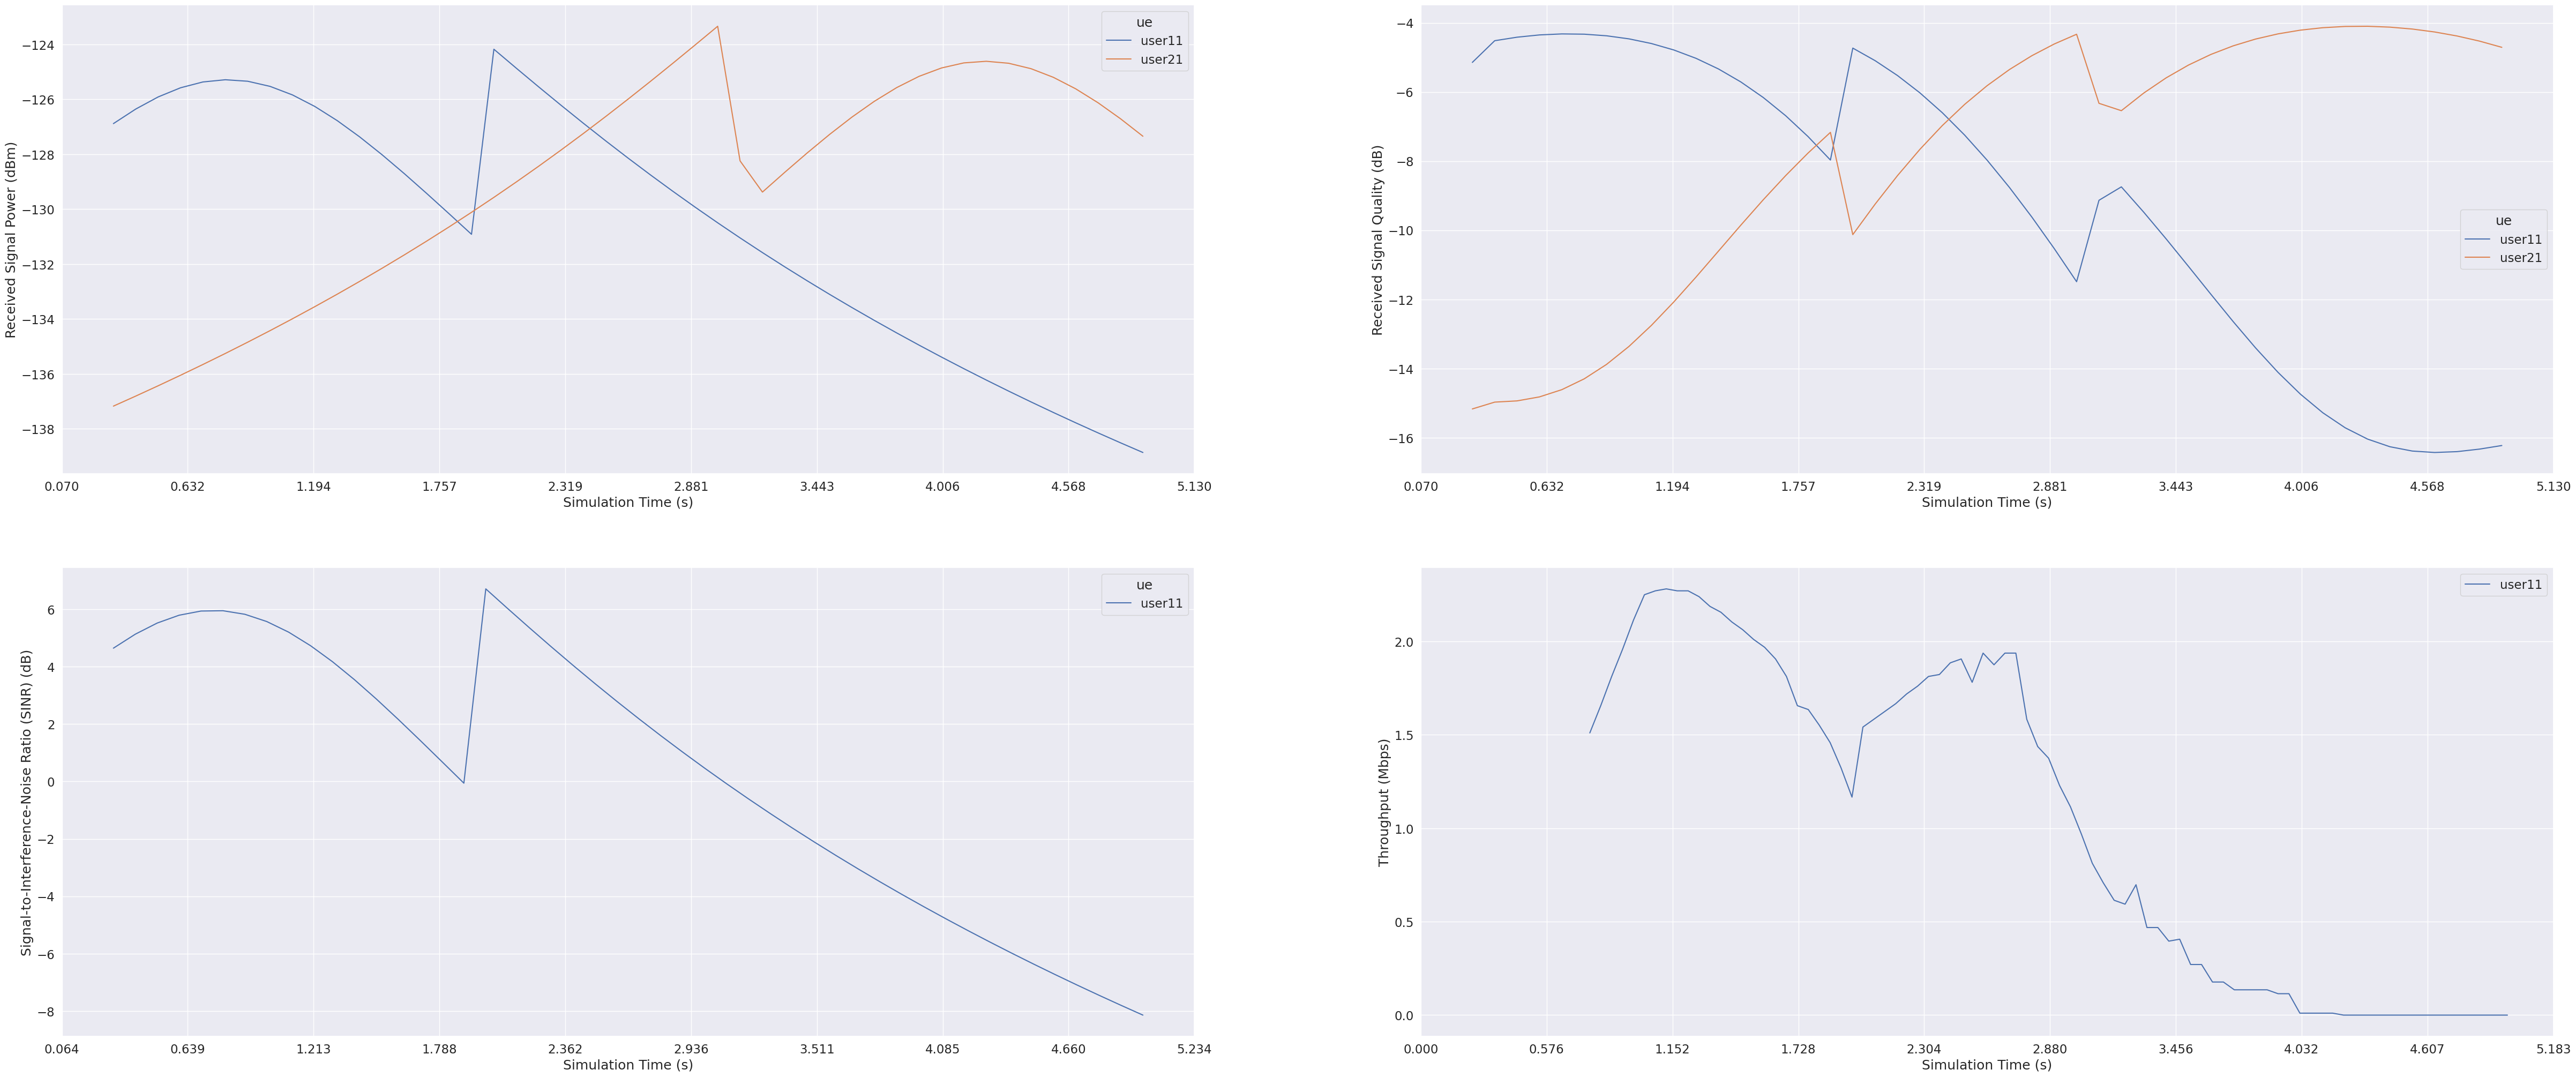

In [5]:
# for the plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 4.4 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell in absence of X2 interface. Keep in mind that other types of handovers are possible even if X2 link is not available. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q4.4.1: What type of handover can be conducted in the absence of X2 connection between two eNB’s? Explain if this handover is performed in this simulation?
> Hint: The handover can still be done using EPC...

<b><u>Answer:</u></b> In the absence of X2 connection between two eNB's a S1 handover can conducted. This handover is managed using the MME. However, a handover is not conducted here since we have disabled the handover and can be seen by the throughput going to zero.

#### Q4.4.2: What are the some disadvantages and possible consequences of performing this type of handovers ,specified in Q4.4.1, instead of X2 handovers?

<b><u>Answer:</u></b> 

Disadvantages and consequences: 
- The handover takes a bit longer than over the X2-inteface. This is cause by the handover to be more complex since it uses more network elements. 
- When doing a handover, uplink data from the UE through the source eNB is first enabled, before dowlink data is enabled. This leads to a short eriod of time where the DL data is going to the source eNB, back to the S-GW and then back to the target eNB, before the last part of the handover is conducted.
- There will be signalling overhead to the core network. 

#### Q4.4.3: What may the consequences be if the values of time-to-trigger and hysteris are set too low or too high? Discuss the consequences of all 4 conditions?

<b><u>Answer:</u></b> 

- TTT too high: There will be too long time before a handover is conducted. The UE might get short time periods with low or no recieved signal. 

- TTT too low: There could be a lot of unneccassary handovers over a short period of time. With many UEs this can lead to a congested network.

- Hysterisis too low: With low hysterisis handovers could too easily be triggered. With a too low hysterisis there will occur unesseccary handovers when the benefit of choosing one eNB vs another is too low.

- Hysterisis too high: Too few handovers will occur. The UE will recieve bad signal power/quality before the handover is conducted




#### Q4.4.4: Which measurement events from <a id='fig2'> [Figure. 2](#fig2) </a> are observed in the simulation results? 
> Hint: Check RSRP\RSRQ graphs for observing these events. 

<b><u>Answer:</u></b>

This is what we chose of scenarious and we igNored the spikes to make it more realistic. 

A1: From the beginning: 0.2s

A2: 1.5s. The RSRQ and RSRP is decreasing below our deifined treshold. 

A3: 2.5s. Is the hysteris of 2 dB between the RSRP between theneighbouring cell and the serving cell. 

A4: 2.516s Since Time-to-Trigger is 16ms this is the time when the handover will happen. 

A5: Did not happen in our scenario

### <a id='scenario2'> <span style="color:blue"> *Scenario 2: Handover enabled (X2 interface exists between eNBs)* </span></a>

This scenario covers the handover simulation for <a id='fig5'>[Figure. 5](#fig5)</a> using the designed topology in <b> <a id='scenario1'>Scenario 1</a></b> with X2 interface enabled. 

 

| |
|---|
|![lab5-task2-top.png](Figures/lab5-task2-top.png) |  
<a id='fig5'><p style="text-align: center;"><b>[Figure. 5: A multicellular mobility example.](#fig5)</b></p></a>



The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- enable handover = <b>yes</b>
- show topology (yes or no)

In [7]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
3_1Des
task_2Per



List the simulation to run:  task_2Per


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 yes


X2 will be enabled allowing HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image task_2Per.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.10s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.26s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.14s/simulation]

Simulation 3 finished!


In [8]:
%run -i 'Modules/lab5-dataPre.py'

time     tput      ue
user11 0   0.055993  0.00000  user11
       1   0.105993  0.00000  user11
       2   0.155993  0.00000  user11
       3   0.205993  0.00000  user11
       4   0.255993  0.00000  user11
       5   0.305993  2.34375  user11
       6   0.355993  2.96875  user11
       7   0.405993  3.12500  user11
       8   0.455993  3.12500  user11
       9   0.505993  3.12500  user11
       10  0.555993  3.12500  user11
       11  0.605993  3.12500  user11
       12  0.655993  3.43750  user11
       13  0.705993  3.43750  user11
       14  0.755993  3.43750  user11
       15  0.805993  3.43750  user11
       16  0.855993  3.43750  user11
       17  0.905993  3.43750  user11
       18  0.955993  3.28125  user11
       19  1.005990  3.12500  user11

In [ ]:
# to visualize the contents of the metric variables
# display(res_signalpower)
# display(res_sinr)
# display(res_throughput.tail(20))

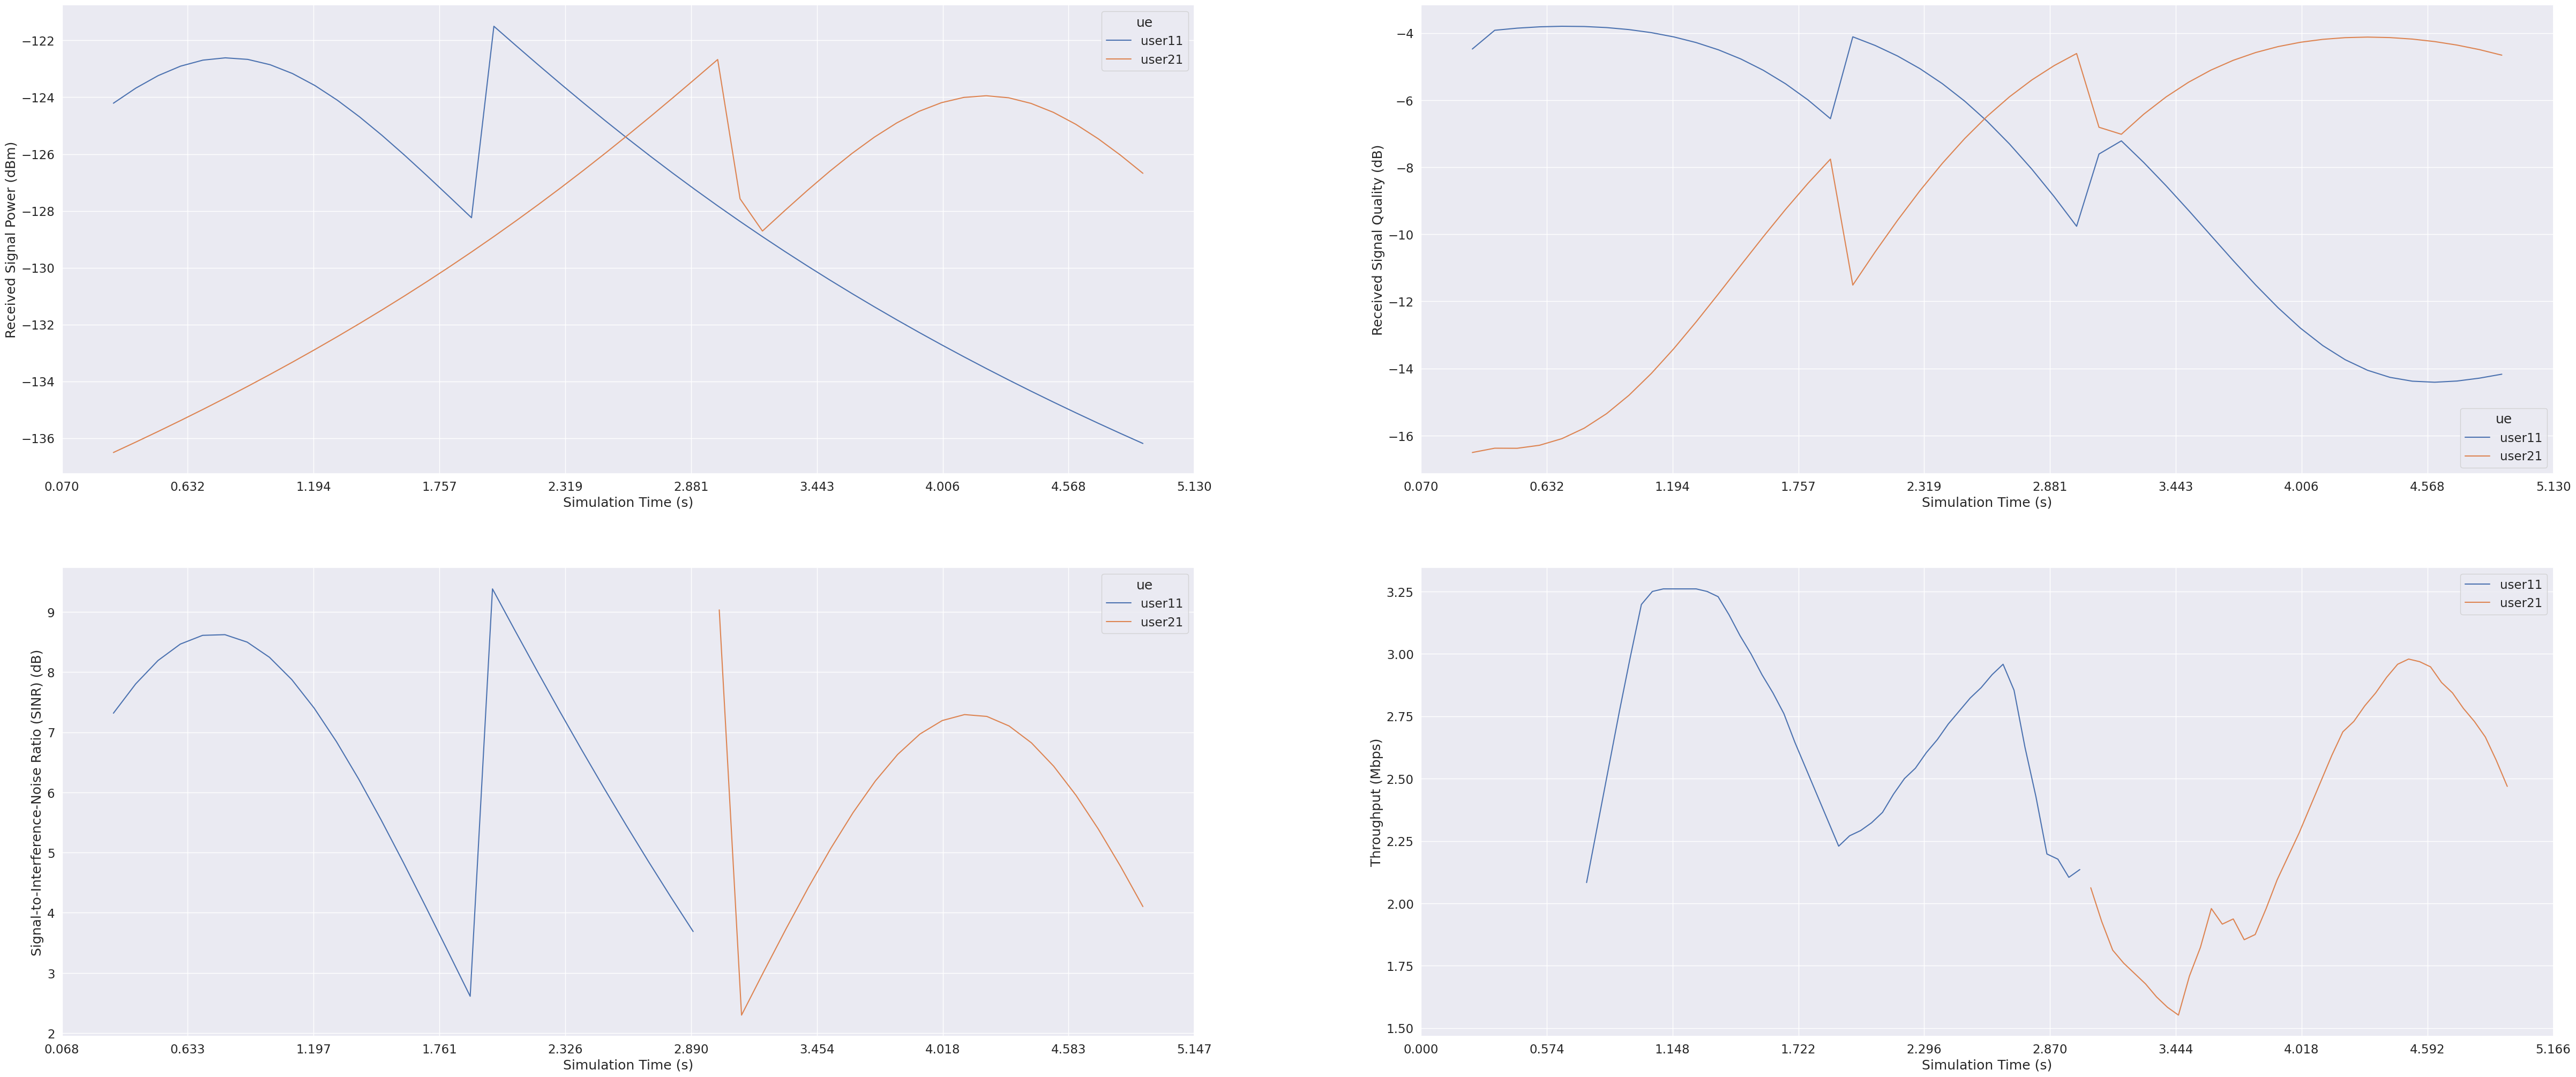

In [9]:
# for the plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 4.5 Results
The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell in presence of X2 interface. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q4.5.1: Compare the results of the throughput graph with the one obtained in the previous scenario, (4.3) with regard to the following: Disruption of traffic, service degradation, level of throughput, variance in throughput?

<b><u>Answer:</u></b> 

In this simulation we get disruption of traffic at 2.89 since it is a hard handover. This is in contrast to 4.3 where there are no disruption and the service and the trhougput are slowly decreasing. In this scenario there is more variance in throughput, but also higher througput, both due to the handover.  

#### Q4.5.2a: What are possible causes that users may experience a disruption of service in scenarios where an handover should have been performed?

<b><u>Answer:</u></b>
In practice the users will not siginificantly EXPERIENCE a disruption during a handover in 4G, but 4G has hard handovers. This will lead to small disruptions of service, which usually go unrecognized by the users. If the users significantly experience disruption this cn be due to bad coverage in border areas from both eNBs. It can also be the use of too high hysterisis and/or TTT.

#### Q4.5.2b: Explain the difference between hard and soft handover. Which type of handover is most susceptible to service disruption and why?

<b><u>Answer:</u></b>
A hard handover is a cell change where the UE is only connected to one cell at a time. The connection to the old cell is released before the UE establishes connection to the new cell.
A soft handover is a handover where the UE is simultaneously connected to multiple cells at once, the old and the new cell. This is a smoother and more seamless transition of cells, as the connection of the UE is gradually changed from cell to cell. 
The hard handover is the one more susceptible to service disruption, because the user’s connection is interrupted for a Short time during the cell change. This disruption can lead to service disruption. In soft handovers, the user has constant connection to either the old or the new cell and so he won’t get disrupted at any point during the handover.

#### Q4.5.3: How are the S1 and X2 based handovers different from each other? When should each of them be utilized?

<b><u>Answer:</u></b>
The S1 handover involves the LTE core network to make cell changes, in particular, communication with the MME is crucial. In X2 handover processes, the eNBs has an x2 interface between themselves, meaning the handover can happen directly between them, without involving the LTE core network. The S1 handover are used when there are no X2 handovers and we need to change eNB. The X2 handover should be utilized whenever we want to change eNB and the X2 interface are available.

#### Q4.5.4: Find the time instance when A3 is triggered in <b><a id='scenario1'>Scenario 1</a></b> and <b><a id='scenario2'>Scenario 2</a></b>? Also specify the observed values at A3 event for RSRP, RSRQ and SINR for the serving and neighbor cells?
> Hint: Consider the hysteresis = 0 and check the RSRQ plot to determine the time instances.

<b><u>Answer:</u></b>

Scenario 1: 2.4s
Serving cell: RSRP = -127dBm, RSRQ = -7dB and SINR = 3.9dB
Neighbor cell: RSRP = -127dBm, RSRQ = -7dB and SINR = Do not excist

Scenario 2: 2.5s
Serving cell: RSRP =-126.5dBm, RSRQ=dB and SINR = 5.5dB
Neighbor cell: RSRP = -126.5dBm, RSRQ=-7dB and SINR = Do net excist (yet)



---
---
### <span style="color:green"> Milestone 2 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 5. <span style="color:red"> *Task#3: Impact of Channel and Clutter (Buildings etc.) on Handovers* </span>
This task deals with studying the impact of changing channel properties via the introduction of buildings in the radio environment. This change will lead to enhancement in effects of phenomenon including but not limited to signal reflection, absorption, scattering and loss due to the buildings. This also produces multi-path effects in the channel due to which signal takes multiple paths to reach the UE. The simulations cover two scenarios where a simple radio environment consisting of 2 eNBs and a mobile is considered in the absence and presence of buildings. 

Consequently, the communication path between UE and eNB will be either line-of-sight (LOS), non-line-of-sight (NLOS) or a hybrid combination of both modes. 

### <span style="color:blue"> *Scenario 1: Simulation without any buildings* </span>
The topology to be designed for this scenario is shown as follows:

| |
|---|
|![lab5-nobuildtask3-top.png](Figures/lab5-nobuildtask3-top.png) |  
<a id='fig6'><p style="text-align: center;"><b>[Figure. 6: A simple topology for HO without buildings.](#fig6)</b></p></a>


### 5.1 Simulate the designed topology in ns-3
Use the <b>lab5-init.py</b> and the <a id='fig6'>[Figure. 6](#fig6)</a> to design the topology using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate.

<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b>enable handover = yes</b>
- show topology (yes or no)

In [23]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
3_1Des
task52
task5_2
task_2Per
task5_1
task51



List the simulation to run:  task51


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 y


X2 will be enabled allowing HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image task51.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.28s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.15s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.04s/simulation]

Simulation 3 finished!


In [24]:
%run -i 'Modules/lab5-dataPre.py'

time     tput      ue
user11 0   0.039128  0.00000  user11
       1   0.089128  0.00000  user11
       2   0.139128  0.00000  user11
       3   0.189128  0.00000  user11
       4   0.239128  0.00000  user11
       5   0.289128  1.40625  user11
       6   0.339128  3.43750  user11
       7   0.389128  4.37500  user11
       8   0.439128  4.37500  user11
       9   0.489128  4.37500  user11
       10  0.539128  4.53125  user11
       11  0.589128  4.37500  user11
       12  0.639128  4.37500  user11
       13  0.689128  4.37500  user11
       14  0.739128  4.37500  user11
       15  0.789128  4.37500  user11
       16  0.839128  4.53125  user11
       17  0.889128  4.37500  user11
       18  0.939128  4.37500  user11
       19  0.989128  4.37500  user11

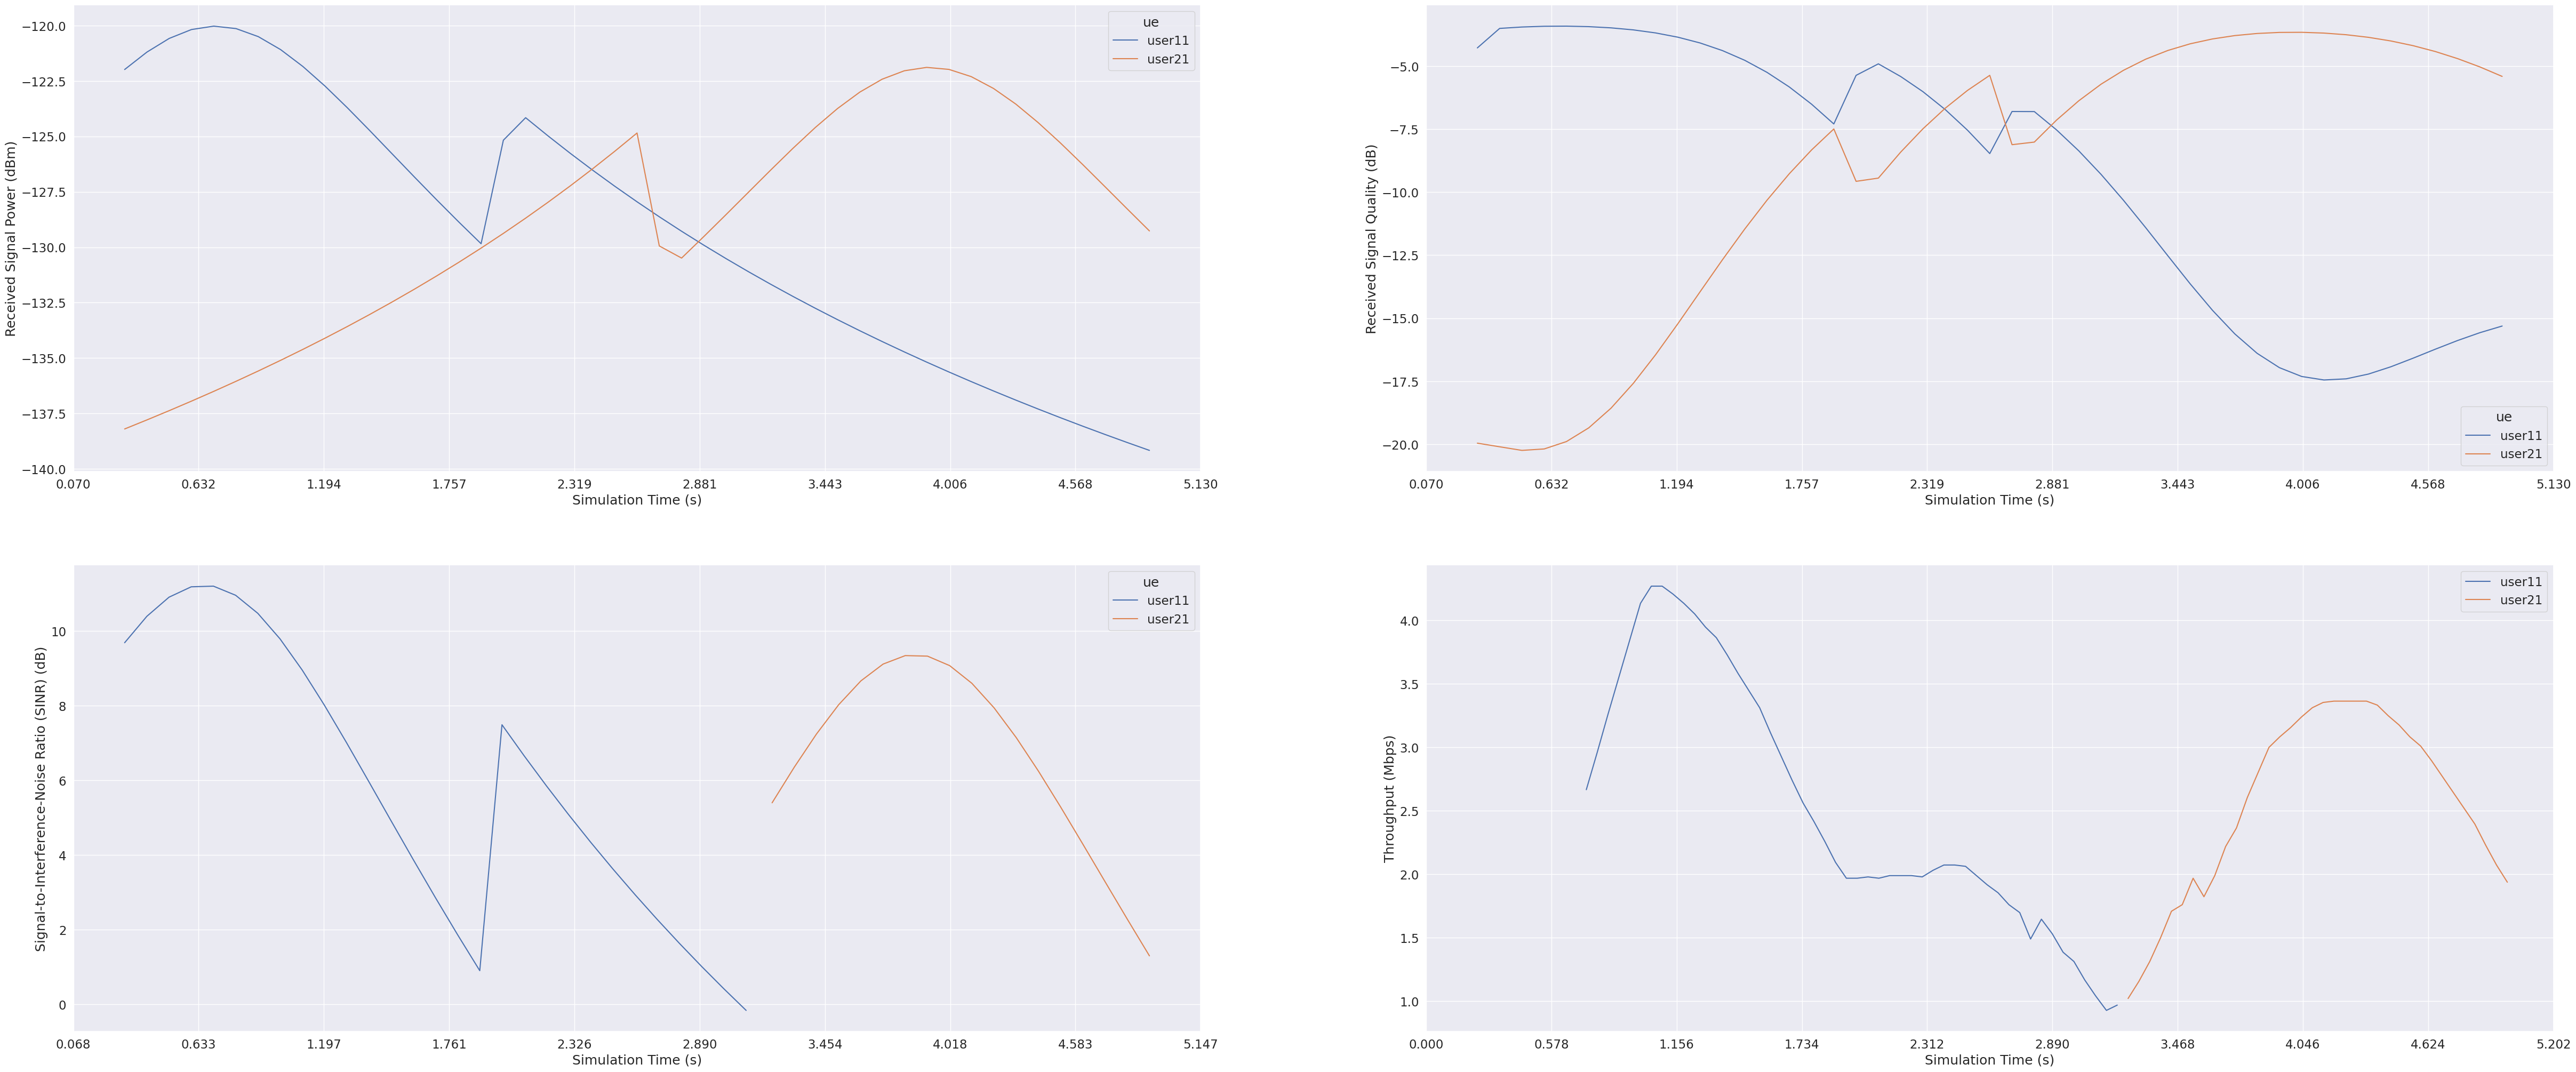

In [25]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### <span style="color:blue"> *Scenario 2: Simulation with 2 buildings* </span>
Design the topology shown in <a id='fig7'>[Figure. 7](#fig7)</a> using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

| |
|---|
|![lab5-task3build-top.png](Figures/lab5-task3build-top.png) |  
<a id='fig7'><p style="text-align: center;"><b>[Figure. 7: A simple building topology for HO.](#fig7)</b></p></a>


### 5.2 Simulate the designed topology in ns-3
The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b> enable handover = yes </b>
- show topology (yes or no)

In [18]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
3_1Des
task52
task5_2
task_2Per
task5_1
task51



List the simulation to run:  task52


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 yes


X2 will be enabled allowing HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image task52.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.10s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.10s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.05s/simulation]

Simulation 3 finished!


In [19]:
%run -i 'Modules/lab5-dataPre.py'

time     tput      ue
user11 0   0.022356  0.00000  user11
       1   0.072356  0.00000  user11
       2   0.122356  0.00000  user11
       3   0.172356  0.00000  user11
       4   0.222356  0.00000  user11
       5   0.272356  0.15625  user11
       6   0.322356  2.34375  user11
       7   0.372356  2.18750  user11
       8   0.422356  2.34375  user11
       9   0.472356  2.18750  user11
       10  0.522356  3.12500  user11
       11  0.572356  3.12500  user11
       12  0.622356  3.12500  user11
       13  0.672356  3.12500  user11
       14  0.722356  3.12500  user11
       15  0.772356  2.96875  user11
       16  0.822356  3.12500  user11
       17  0.872356  3.12500  user11
       18  0.922356  3.12500  user11
       19  0.972356  3.12500  user11

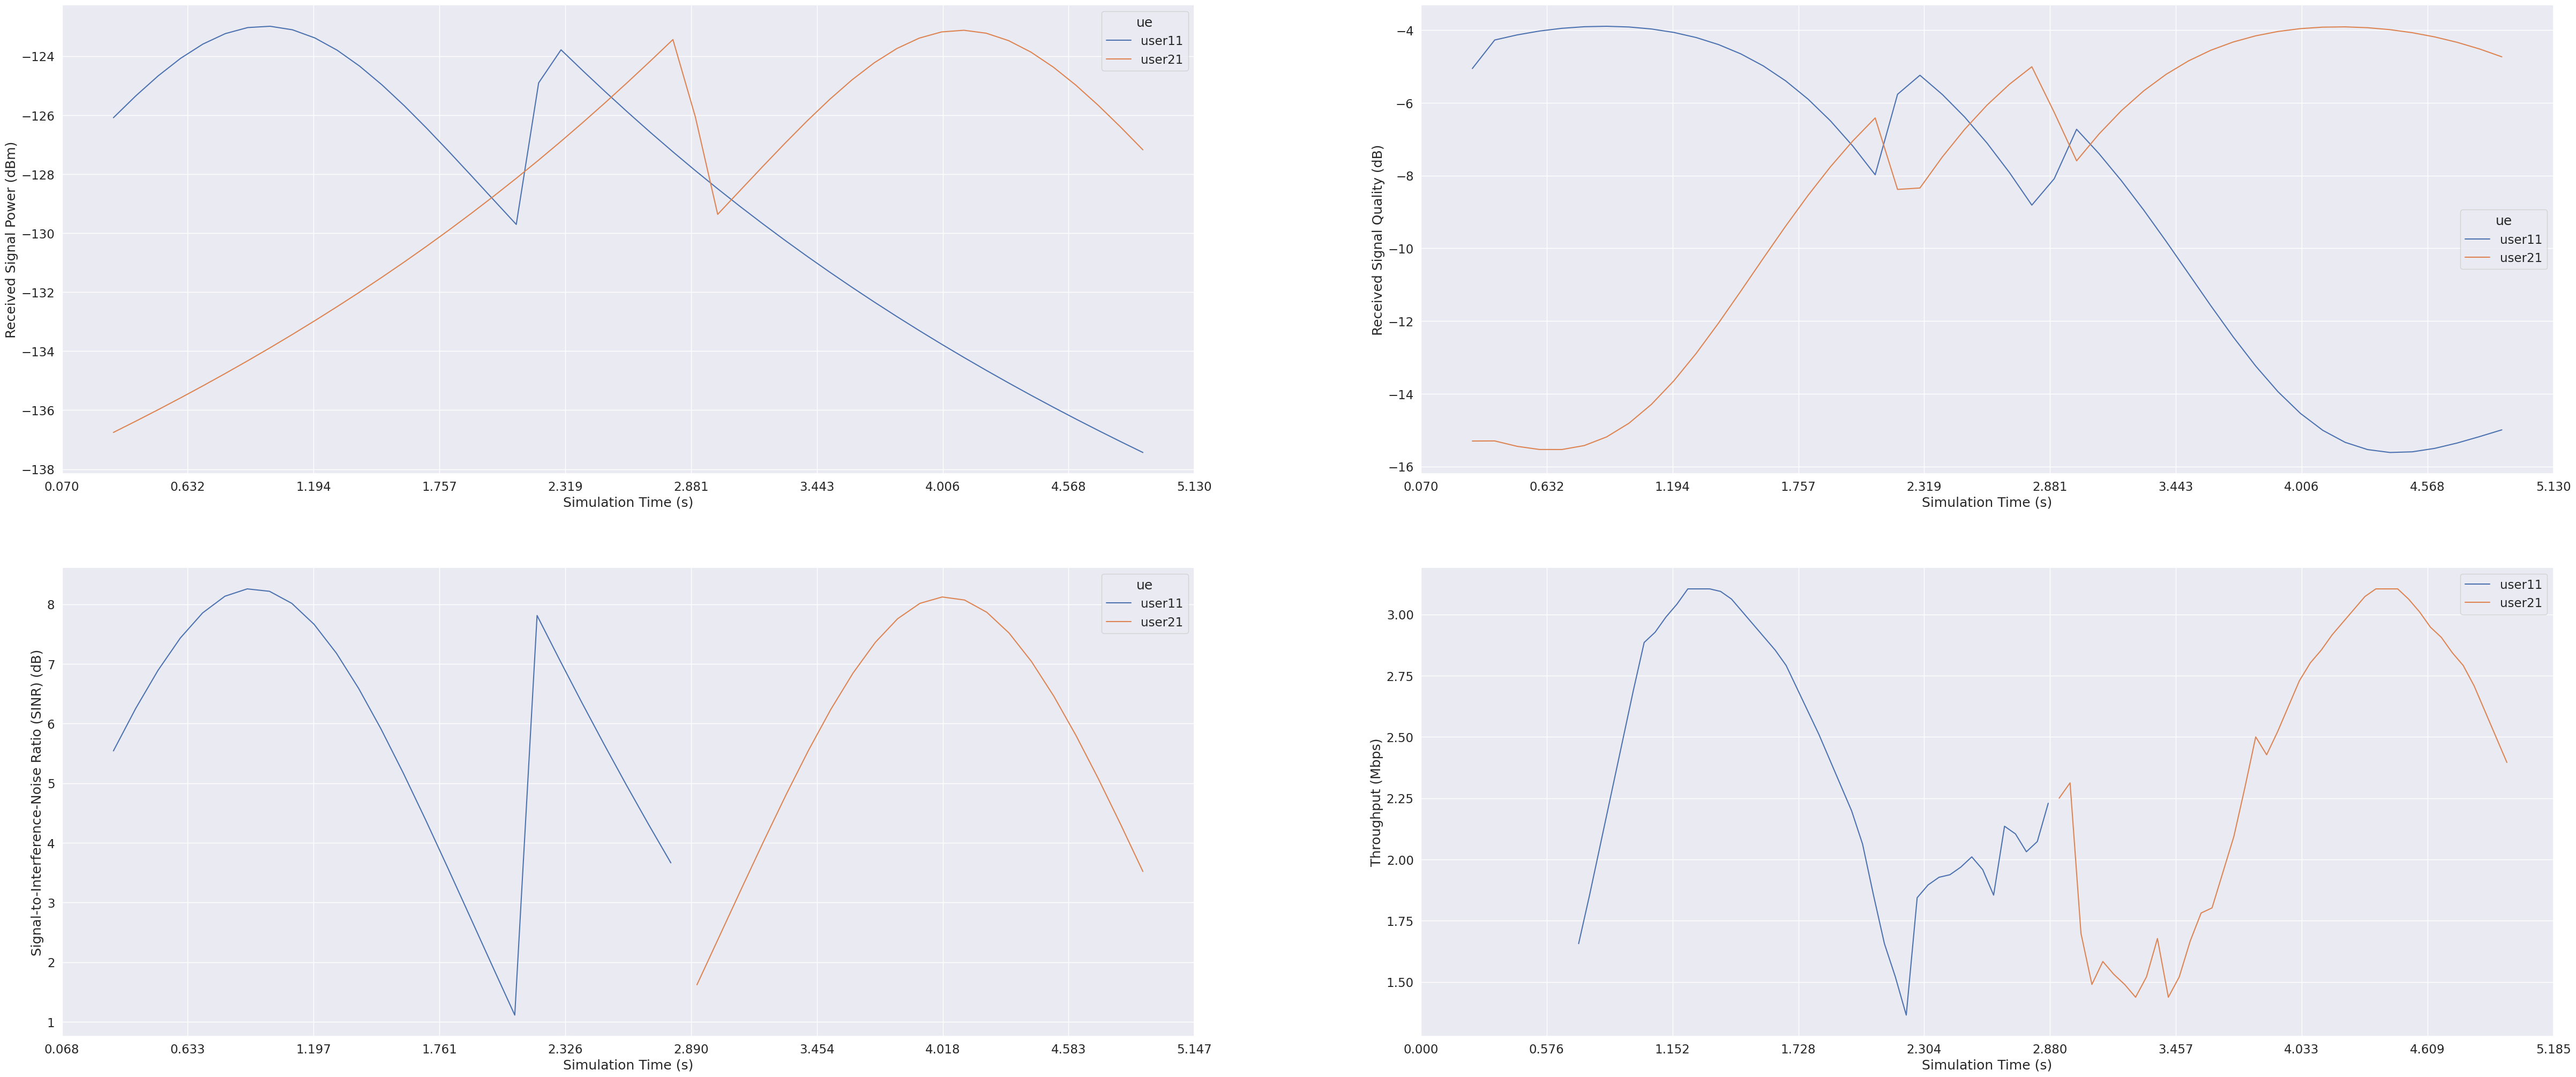

In [20]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 5.3 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell as channel model changes due to clutter differences in the coverage area. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q5.3.1: What type of behavior do you expect from the measurements when the UE moves behind the building. Is this occurring in the simulation?
> Hint: Compare both the cases with and without building to see if there are unexpected dips in throughput even though user is close to the eNB.
> To check: Try changing the location of buildings to see if it has an impact. 

<b><u>Answer:</u></b>
When a UE moves behind a building, the signal from the eNB to the UE is affected by attenuation.  The attenuation might cause reduced Signal-To-Noise ratio and increasing bit error rate, which ultimately results in a reduced throughput. By looking at the graph with the throughput in Scenario 1 and comparing it to scenario 2, this makes sense. We see that we get a dip in throughput in scenario 2 at 2.3 sec and 3-3.4 sec, which we deduce is when the UE is behind the buildings. 

#### Q5.3.2: What parameters can be adjusted to optimize the handover performance in a scenario where there are lot of buildings and obstacles? How should they be adjusted?
> Note: By optimization, it is meant that only necessary handovers are performed, and unnecessary handovers are avoided. 

<b><u>Answer:</u></b>
Depending on what you want to achive we can increases the TTT. This will lead to a longer time before conducting a handover after the hysterisis treshold is reached. In places with multiple buildings and moving UEs this will be beneficial because it will prevent handovers to eNBs that only has good connection in a slight window when the UE is moving. The tradeoff will however, be lower throughput due to not using the best eNB all the time, but it will prevent rapid change of eNBs. 



#### Q5.3.3: What impact can buildings have on signal propagation? How can this be observed in the throughput results?
> Hint: Important to consider the many short variations and more than coverage between the buildings.

<b><u>Answer:</u></b> 
The impact buldings can have on signal propagation can be quite significant. The impacts depends on the materials used, the shape and size of the buildings and the location of antennas and receivers. 

Some building materials, such as concrete, brick, and metal, can absorb or reflect signals, leading to signal loss or interference. On the other hand, materials such as glass and wood may allow signals to pass through with minimal attenuation. The thickness and density of these materials can also affect signal propagation.

The shape and size of a building can also impact signal propagation. For example, tall buildings can block or reflect signals, while long and narrow buildings can cause signal diffraction and scattering. This can cause mulitpath propagation where the radio signals will reach the antenna by two or more paths. 

In our throughput results we see that the throughput dips when a building is between the UE and the eNB. An gets better again when moving away. 



---
---
### <span style="color:green"> Milestone 3 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 6. <span style="color:red"> *Task#4: Impact of Carrier Frequency and Bandwidth* </span>
This task covers the concepts of differentiation in bandwidth and center frequencies for different eNBs. This is achieved by creating a 2 cell topology and allocation of carrier bandwidths to each eNB. The impact of this allocation will be observable through the measured UE throughput for different users in the coverage area of both eNBs.  This task consists of 2 scenarios for comparing the usage of similar and different carrier frequency and bandwidth.
> Note: In LTE, same carrier freqeuncies are almost never used but we have presented a scenario to discuss the reasons for this choice.

### 6.1 Carrier frequency and Bandwidth in LTE
In this task, we utilize different LTE bands for the two eNBs in the topology along with different allocation of bandwidth values selected from the the <b>Table 5.7.3-1</b> <a href="#References">[5]</a>. The carrier frequency bands chosen for eNBs are 1 and 2 from the specified table which implicates the following frequency bands for the downlink and uplink channels:

#### <u>Band 1 Values</u>
- Downlink Carrier Frequency: 2120
- Uplink Carrier Frequency: 1930

#### <u>Band 2 Values</u>
- Downlink Carrier Frequency: 1950
- Uplink Carrier Frequency: 1870

These values are selected inside the ns-3 script so there is no need to configure them here.

### <a id='t4-scenario1'> <span style="color:blue"> *Scenario 1: Same Carrier frequency and Bandwidth* </span></a>
The topology shown in <a id='fig8'>[Figure. 8](#fig8)</a> consists of a mobile UE moving between coverage regions of both eNB.
| |
|---|
|![lab5-task4-top.png](Figures/lab5-task4-top.png) |  
<a id='fig8'><p style="text-align: center;"><b>[Figure. 8: A multicellular mobility and HO scenario.](#fig8)</b></p></a>

### 6.2 Use a different python script
The python code in <b>lab5-init-bw.py</b> uses a different set of command line arguments to provide the necessary information regarding carrier frequency and bandwidth to the LTE network topology to be designed in ns-3. The parameters required are listed as follows along with their recommended values: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b> bandwidth for eNB1</b> (10)
- <b> bandwidth for eNB2</b> (3)
- <b> enable different center frequencies</b> (no)
- show topology (yes or no)
 
The values of bandwidth will set up the number of available resource blocks (RB) that can be used for carrying data in the physical layer. The higher the value, more RBs will be made available. 

In [32]:
%run -i 'Modules/lab5-init-bw.py'

List of created simulations: 
 
3_1Des
task52
task5_2
task_2Per
task5_1
task51



List the simulation to run:  task51



Please enter the following required parameters:
Enter the channel bandwidth for 1st eNB (valid values in MHz: 1.4,3,5,10,15,20)


 10


Enter the channel bandwidth for 2nd eNB (valid values in MHz: 1.4,3,5,10,15,20)


 3


Enable different carrier frequencies in eNBs (yes OR y OR no OR n):


 n


Channel bandwidth for the eNBs is (MHz):  10.0 3.0


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image task51.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.17s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.12s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.00s/simulation]

Simulation 3 finished!


In [33]:
%run -i 'Modules/lab5-dataPre.py'

time     tput      ue
user11 0   0.094324  0.00000  user11
       1   0.144324  0.00000  user11
       2   0.194324  0.00000  user11
       3   0.244324  0.00000  user11
       4   0.294324  1.71875  user11
       5   0.344324  3.43750  user11
       6   0.394324  3.43750  user11
       7   0.444324  3.43750  user11
       8   0.494324  3.43750  user11
       9   0.544324  4.06250  user11
       10  0.594324  4.37500  user11
       11  0.644324  4.37500  user11
       12  0.694324  4.37500  user11
       13  0.744324  4.37500  user11
       14  0.794324  4.53125  user11
       15  0.844324  3.75000  user11
       16  0.894324  3.43750  user11
       17  0.944324  3.43750  user11
       18  0.994324  3.43750  user11
       19  1.044320  3.43750  user11

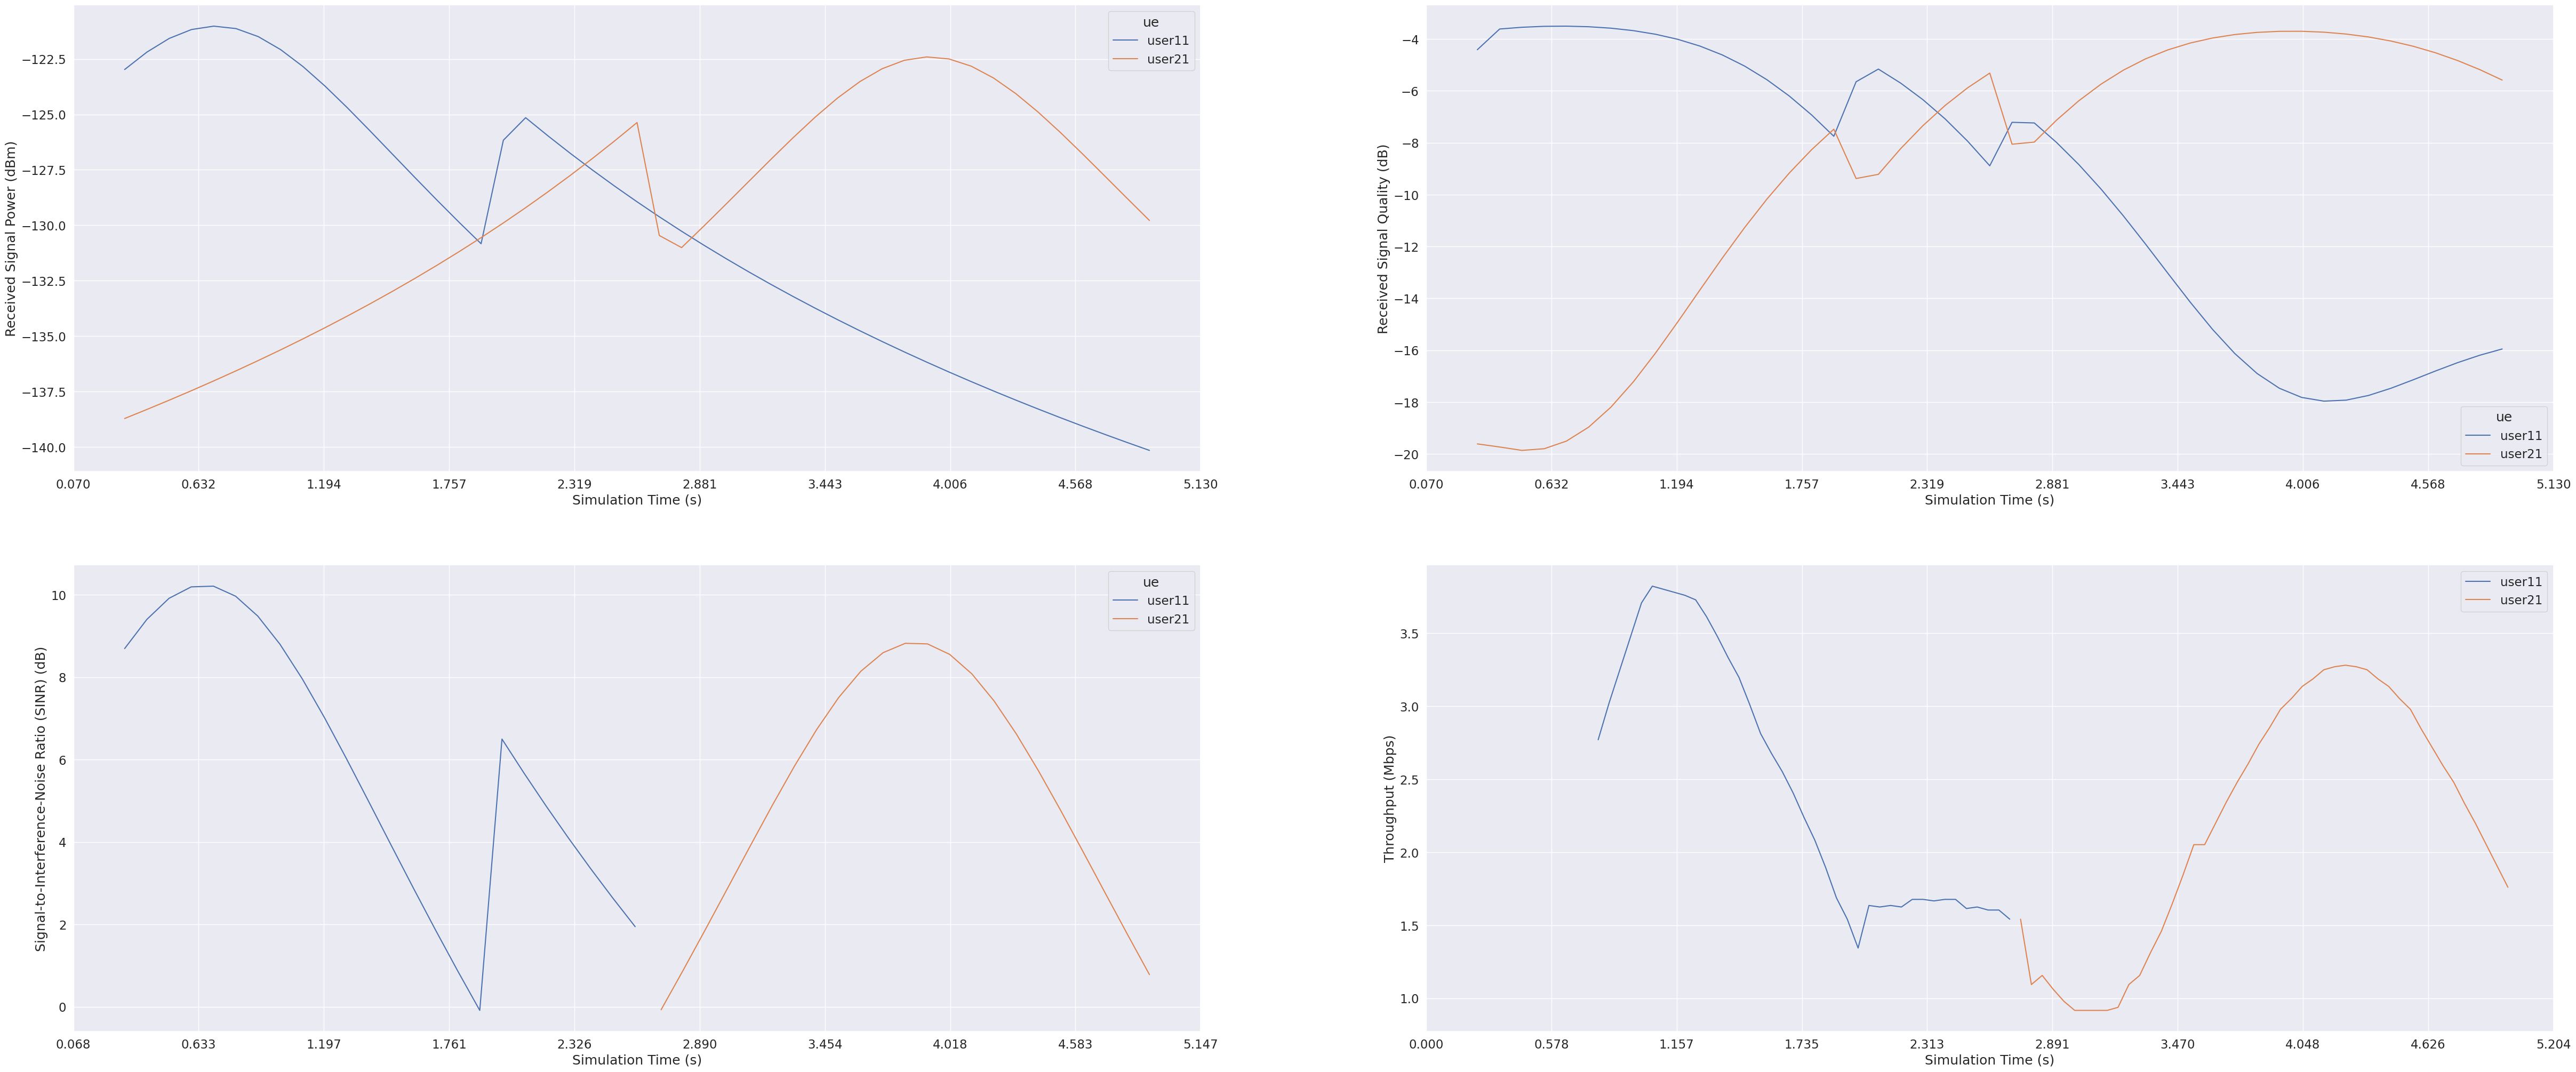

In [34]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 6.3 Results

The results provide the observed values for RSRP, RSRQ, SINR and measured throughput for the mobile user as it traverses two eNBs with similar available resources (bandwidth). The results should be analyzed in the light of the following exercises:

### <u>Exercises</u>

#### Q6.3.1: Consider the throughput graph for the UE, what is the result of the difference in badnwidths, between the eNBs?

<b><u>Answer:</u></b>
eNB1 provides higher throughput, bacause it has higher bandwidth. In addition, parts of the band don't collide with eNB2s band, while eNBs whole band will interfere with eNB1s band. 


#### Q6.3.2: Why is using different center frequencies important in cellular networks across different cells? 

<b><u>Answer:</u></b> 
To avoid interference between different cells, and have less bit error. Overall using different center frequencies will lead to higher throughput. Another reason is to maximise spectrum efficiency, by using different frequencies for different cells, more users and highers speeds can be achieved in the network.



### <a id='t4-scenario2'> <span style="color:blue"> *Scenario 2: Different Carrier frequency and Bandwidth* </span></a>
### 6.4 Use a different python script
The python code in <b>lab5-init-bw.py</b> uses a different set of command line arguments to provide the necessary information regarding carrier frequency and bandwidth to the LTE network topology to be designed in ns-3. The parameters required are listed as follows along with their recommended values: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b>bandwidth for eNB1</b> (10)
- <b>bandwidth for eNB2</b> (3)
- <b>enable different center frequencies</b> (yes)
- show topology (yes or no)

The values of bandwidth will set up the number of available resource blocks (RB) that can be used for carrying data in the physical layer. The higher the value, more RBs will be made available. 

In [35]:
%run -i 'Modules/lab5-init-bw.py'

List of created simulations: 
 
3_1Des
task52
task5_2
task_2Per
task5_1
task51



List the simulation to run:  task51



Please enter the following required parameters:
Enter the channel bandwidth for 1st eNB (valid values in MHz: 1.4,3,5,10,15,20)


 10


Enter the channel bandwidth for 2nd eNB (valid values in MHz: 1.4,3,5,10,15,20)


 3


Enable different carrier frequencies in eNBs (yes OR y OR no OR n):


 y


Channel bandwidth for the eNBs is (MHz):  10.0 3.0


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image task51.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.04s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.12s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.19s/simulation]

Simulation 3 finished!


In [36]:
%run -i 'Modules/lab5-dataPre.py'

time     tput      ue
user11 0   0.051617  0.00000  user11
       1   0.101617  0.00000  user11
       2   0.151617  0.00000  user11
       3   0.201617  0.00000  user11
       4   0.251617  0.00000  user11
       5   0.301617  3.75000  user11
       6   0.351617  5.78125  user11
       7   0.401617  5.62500  user11
       8   0.451617  6.25000  user11
       9   0.501617  6.56250  user11
       10  0.551617  6.71875  user11
       11  0.601617  6.71875  user11
       12  0.651617  6.56250  user11
       13  0.701617  6.71875  user11
       14  0.751617  6.71875  user11
       15  0.801617  6.56250  user11
       16  0.851617  6.71875  user11
       17  0.901617  6.56250  user11
       18  0.951617  5.78125  user11
       19  1.001620  5.78125  user11

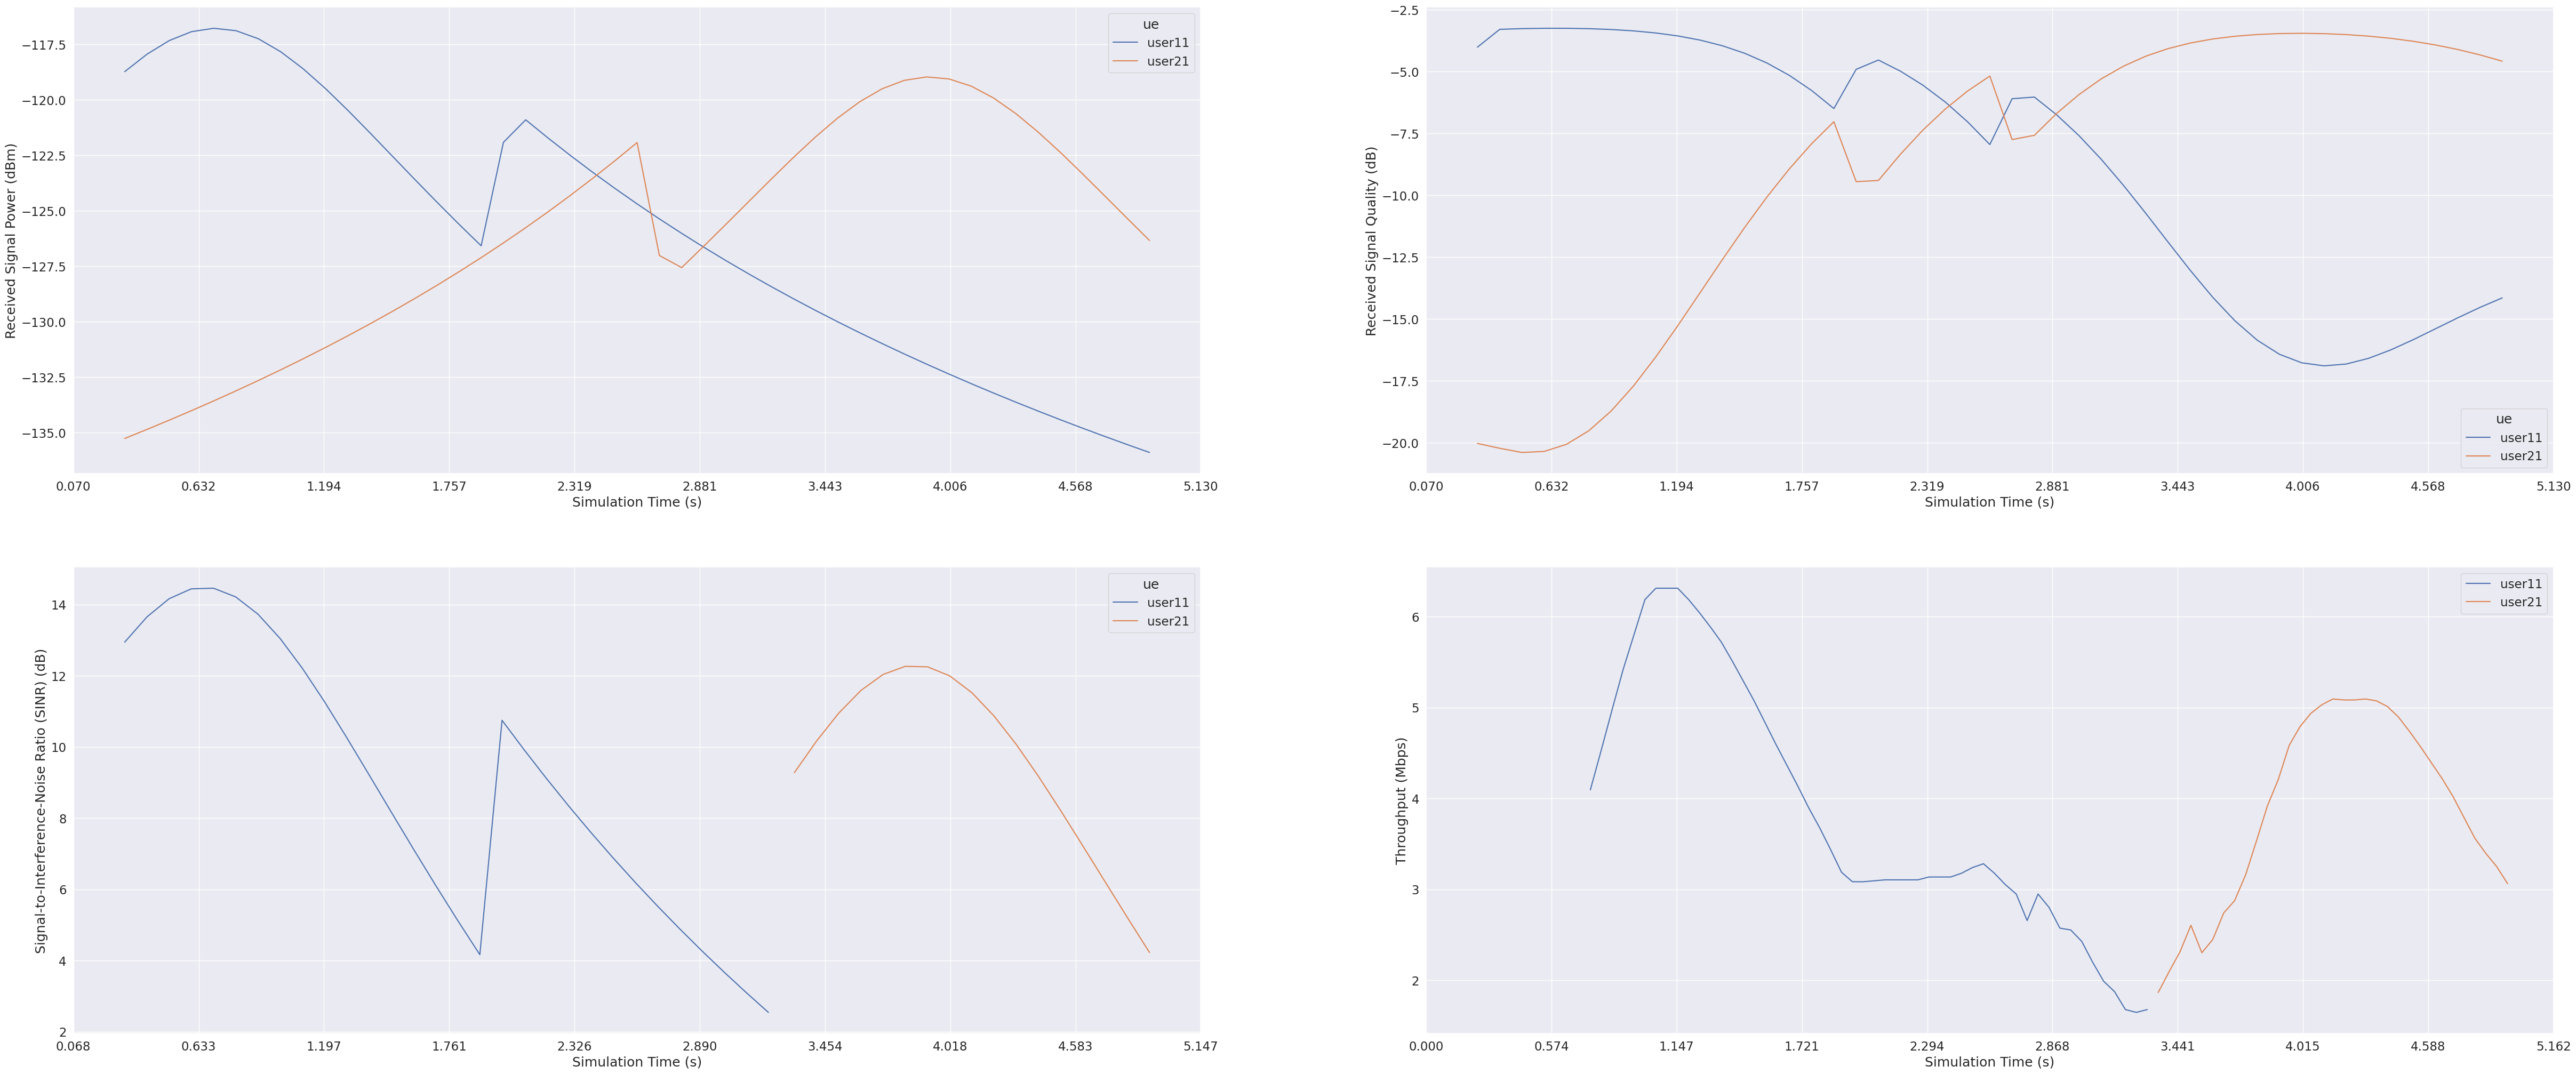

In [37]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 6.5 Results

The results provide the observed values for RSRP, RSRQ, SINR and measured throughput for the mobile user as it traverses two eNBs with differing available resources (bandwidth). The results should be analyzed in the light of the following exercises:

### <u>Exercises</u>

#### Q6.5.1: Compare the two scenarios, with the same or different carrier frequency, what changes in throughput can be observed?

<b><u>Answer:</u></b>
We see almost a doubling of the throughput from scenario 1 to scenario 2. Other than that the graphs looks very similar.



#### Q6.5.2: What type of handover takes place in Scenarios 1 and 2?
> Hint: Choose from Soft or Hard handover types. Also specify X2 or S1 type of handover in both scenarios.

<b><u>Answer:</u></b>
As we can see from the throughput, there is a gap, which means there are a hard handover. In both the scenarios thera are a X2 handover. This can be seen of the short amount of time that the handover takes. Also the eNB talks directly to each other which means there is a X2 interface present. (Also the simulations do not have S1 handover implemented)


#### Q6.5.3: What causes the difference in handover times in Scenarios 1 and 2?
> Hint: Keep in mind the mechanics of the handover process.

<b><u>Answer:</u></b>
The handover process happens later in scenario 2 than in scenario 1. This is due to eNB1 providing better throughput for a longer time. Therefore we want to do a handover later than in scenario 1. 


#### Q6.5.4: Explain the observed results for RSRP, RSRQ, SINR, and throughput by summarizing the important trends? How can the differences between the scenarios 1 and 2 can be explained?
> Hint: For example, if the value of SINR decreased for one eNB, then what can be the reason for that decrease needs to be mentioned and so on.

<b><u>Answer:</u></b>
Overall scenario 2 performs better in all categories. This is due to the interference in scario 1. In scenario 1 there will be interference between the whole band of eNB2 and partly eNB1. This leads to higher SINR in scenario 1, which in turn leads to higher signal quality and throughput. I don't know the simulation dettails of how codecs are chosen, but a codec with less error correction and more data could be utulized, which in turn leads to higher throughput.


---
---
### <span style="color:green"> Milestone 4 </span>

At the end, **call a TA** to make sure everything went as expected.

---
---

# References

[1] "From GSM to LTE-Advanced Pro and 5G, An introduction to Mobile Networks and Mobile Broadband", Martin Sauter, 4th Edition, 2021

[2] "Evolved Universal Terrestrial Radio Access (E-UTRA); Radio Resource Control (RRC); Protocol specification", 3GPP. Online: https://portal.3gpp.org/desktopmodules/Specifications/SpecificationDetails.aspx?specificationId=2440 (Accessed: 15-02-2023)

[3] "Handover Event LTE", 4G/LTE-Measurement. Online: https://www.thinkcorpindonesia.com/handover-event-lte/https://www.thinkcorpindonesia.com/handover-event-lte/ (Accessed : 16-02-2023)

[4] Marwat, S.N.K., Meyer, S., Weerawardane, T. and Goerg, C. (2014), Congestion-Aware Handover in LTE Systems for Load Balancing in Transport Network. ETRI Journal, 36: 761-771. https://doi.org/10.4218/etrij.14.0113.1034Marwat, S.N.K., Meyer, S., Weerawardane, T. and Goerg, C. (2014), Congestion-Aware Handover in LTE Systems for Load Balancing in Transport Network. ETRI Journal, 36: 761-771. https://doi.org/10.4218/etrij.14.0113.1034

[5] "Evolved Universal Terrestrial Radio Access (E-UTRA); User Equipment (UE) radio transmission and reception", 3GPP. Online: https://portal.3gpp.org/desktopmodules/Specifications/SpecificationDetails.aspx?specificationId=2411 (Accessed: 15-03-2023)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------